# Hack The Feed: Insights From Social Media Data

### by Judith Okon

![picture](picture.jpeg)

# About this Project

Ladies and gentlemen, welcome to the heart of innovation - the "Hack the Feed" data hackathon. I'm about to take you on a ride into the world of digital marketing, where data reigns supreme and the future is ripe with possibilities.

Playhouse Communication, a trailblazing digital marketing agency in Nigeria, is known for their fusion of tech, design, and media prowess. Their client list includes global heavyweights and nimble SMEs, all driven by the desire to redefine their industries.

So, what's the challenge? I've been entrusted with a treasure chest of exclusive social media data - a unique opportunity and handed the keys to a vault that holds the secrets of the digital marketing universe. "Hack the Feed" isn't just another hackathon; it is the ticket to shaping the future of digital engagement.

The mission was clear: decode the social media enigma from platforms like Instagram, Facebook, Twitter, and LinkedIn. Armed with creativity, I dived deep into this data ocean, hunting for insights that could revolutionize digital marketing.

This report is the culmination of my journey - a document that distills complex data into actionable insights. I've uncovered the secret sauce of audience engagement, identified the social media platforms that pack the most punch, and discovered the prime times for interaction. I've unearthed trends that are rewriting the digital playbook.

As you delve into this report, you'll witness the fusion of creativity and analytics, insights that lead to recommendations, and the birth of a new era in digital marketing. This isn't just a competition; it's an invitation to revolutionize, an opportunity to reimagine the future of digital engagement.
Join me as we embark on this transformative journey, and together, we'll paint the canvas of digital marketing with innovation and excellence.

## Data Dictionary

1. **Date**:
   - Data Type: Datetime
   - Description: The date when the post was made or recorded.

2. **Network**:
   - Data Type: Categorical (String)
   - Description: The social media network or platform where the post was published, e.g., Instagram, Facebook, Twitter, LinkedIn.

3. **Content Type**:
   - Data Type: Categorical (String)
   - Description: The type or format of the content in the post, e.g., text, photo, video, link.

4. **Post**:
   - Data Type: Text
   - Description: The content or message of the post itself.
   
5. **Sent by**:
   - Data Type: Categorical (String)
   - Description: The social media handler for that content
   
6. **Impressions**:
   - Data Type: Numeric (Integer)
   - Description: The total number of times the post was displayed to users, reflecting its reach.

7. **Engagement Rate (per Impression)**:
   - Data Type: Numeric (Float)
   - Description: The ratio of user engagements (likes, comments, shares, etc.) to the number of impressions, indicating how engaging the post is per impression.

8. **Engagements**:
   - Data Type: Numeric (Integer)
   - Description: The total number of interactions or engagements with the post, such as likes, comments, shares, and clicks.

9. **Tags**:
   - Data Type: Text
   - Description: Any relevant tags, keywords, or metadata associated with the post, which can help categorize or identify its content.


# Table of Contents

- [Section 1: Data Familiarization](#Data-Familiarization)
  - [1.1 Loading the Datasets](#Loading-the-datasets)
  - [1.2 Feature Extraction](#Feature-Extraction)
  - [1.3 Data Information](#Data-Information)

- [Section 2: Data Cleaning and Pre-processing](#Data-Cleaning-and-Pre-processing)

- [Section 3: Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis(EDA))
  - [3.1 EDA for Instagram](#1.EDA-for-Instagram)
  - [3.2 EDA for Twitter](#2.EDA-for-Twitter)
  - [3.3 EDA for Facebook](#3.EDA-for-Facebook)
  - [3.4 EDA for LinkedIn](#4.EDA-for-LinkedIn)

- [Section 4: Gaining Insights, Answering Business Questions, and Providing Recommendations](#Gaining-Insights,Answering-Business-Questions-and-Providing-Recommendations)
  - [4.1 Engagement Analysis](#1.Engagement-Analysis)
  - [4.2 Sent By Analysis](#2.Sent-By-Analysis)
  - [4.3 Content Analysis](#3.Content-Analysis)
  - [4.4 Posting Strategy](#4.Posting-Strategy)
  
- [Section 5: Insights and Recommendations Summary + Dashboard](#Insights-and-Recommedation-Summary)


___

# Data-Familiarization

___

This section covers loading datasets from various social media platforms (Twitter, Instagram, Facebook, LinkedIn) and checking missing values. It then extracts and consolidates essential columns from these datasets, creating a unified DataFrame for analysis. The data's basic characteristics and the percentage of missing values in each column are presented, providing an overview of the dataset's structure and potential data quality issues.

# Loading-the-datasets

In [1]:
# Using python because of the size and complexity of the dataset

import pandas as pd
import math


missing_values = [' ','NA', 'N/A', '__', 'na', 'n/a']

twitter = pd.read_csv('Twitter.csv', low_memory = False, na_values = missing_values)
instagram = pd.read_csv('Instagram.csv', low_memory = False, na_values = missing_values)
facebook = pd.read_csv('Facebook.csv', low_memory = False, na_values = missing_values)
linkedin = pd.read_csv('LinkedIn.csv', low_memory = False, na_values = missing_values)

# To display all the columns of the dataframe throughout this notebook
pd.set_option('display.max_columns', None)

In [2]:
# Check the shape of all the datasets
socialmedia_df = {'Twitter':twitter, 'Instagram':instagram, 'Facebook':facebook, 'LinkedIn':linkedin}

for df in socialmedia_df:
    print('This is the {} shape before dropping {}'.format(df, socialmedia_df[df].shape))   

This is the Twitter shape before dropping (8529, 147)
This is the Instagram shape before dropping (10000, 147)
This is the Facebook shape before dropping (9803, 147)
This is the LinkedIn shape before dropping (7760, 147)


# Feature-Extraction 

For this project, certain columns will prove highly valuable, while others won't hold as much significance. After conducting a thorough analysis and experimenting through trial and error, the following columns from all four datasets (Instagram, Facebook, Twitter, LinkedIn) are being chosen for this analysis: 

`Date, Network, Content Type, Post, Impressions, Engagement Rate (per Impression), Engagements, and Tags.`

These columns will be extracted from all four datasets and will be concatenated to create a unified dataframe for further analysis.

In [3]:
needed_columns = ['Date', 'Network', 'Content Type', 'Post', 'Sent by',
                  'Impressions', 'Engagement Rate (per Impression)', 'Engagements', 'Tags']

In [4]:
# feature extraction
twitter = twitter[needed_columns]
instagram = instagram[needed_columns]
facebook = facebook[needed_columns]
linkedin = linkedin[needed_columns]

# feature concatenation
df = pd.concat([twitter,instagram, facebook, linkedin])

# Reset the index
df.reset_index(drop = True, inplace = True)

In [5]:
df.head()

,Date,Network,Content Type,Post,Sent by,Impressions,Engagement Rate (per Impression),Engagements,Tags
0,7/13/2023 10:57 am,Twitter,Photo,Your money should not be a gamble. Before you ...,Sophia Amuka,445,3.6%,16,CIB Posts
1,7/12/2023 8:03 pm,Twitter,Text,"What skill (s) do you have, that no one ever t...",Blessing Ubah,"2,961",1.76%,52,NaN
2,7/12/2023 7:00 pm,Twitter,Photo,Sade was able to acquire a home loan and make ...,Blessing Ubah,850,4.24%,36,Weekly Wealth Posts
3,7/12/2023 6:20 pm,Twitter,Photo,Here are some mistakes you shouldn’t make duri...,Blessing Ubah,"1,499",3.4%,51,NaN
4,7/11/2023 12:50 pm,Twitter,Photo,Safeguard every aspect of your operations with...,Sophia Amuka,"1,184",1.52%,18,"Insurance Limited Posts, Weekly Wealth Posts"


# Data-Information

In [6]:
print('There are {} rows and {} columns in this dataset'.format(df.shape[0], df.shape[1]))

There are 36092 rows and 9 columns in this dataset


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36092 entries, 0 to 36091
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Date                              36092 non-null  object
 1   Network                           36092 non-null  object
 2   Content Type                      36092 non-null  object
 3   Post                              35800 non-null  object
 4   Sent by                           16821 non-null  object
 5   Impressions                       31583 non-null  object
 6   Engagement Rate (per Impression)  30149 non-null  object
 7   Engagements                       33067 non-null  object
 8   Tags                              6187 non-null   object
dtypes: object(9)
memory usage: 2.5+ MB


In [8]:
df.describe()

,Date,Network,Content Type,Post,Sent by,Impressions,Engagement Rate (per Impression),Engagements,Tags
count,36092,36092,36092,35800,16821,31583,30149,33067,6187
unique,27656,4,7,31049,11,8745,1571,1196,135
top,8/10/2022 1:20 pm,Instagram,Photo,Repost #MyDreamsCanBe,Blessing Ubah,0,2.16%,28,CIB Posts
freq,8,10000,29267,43,5712,1470,130,353,879


In [9]:
# checking the percentage of null values in each column
miss = round(df.isnull().sum()/len(df)*100,3).sort_values(ascending = False)
missing = pd.DataFrame({'missing_percentage':miss})
missing

,missing_percentage
Tags,82.858
Sent by,53.394
Engagement Rate (per Impression),16.466
Impressions,12.493
Engagements,8.381
Post,0.809
Date,0.000
Network,0.000
Content Type,0.000


___

# Data-Cleaning-and-Pre-processing

___

This section covers fundamental data preprocessing tasks for a DataFrame, including converting date formats, handling inconsistencies in specific columns, addressing missing values, removing rows with negative values, and adjusting numeric data types. The result is a refined dataset suitable for subsequent analysis.

### Converting date column to datetime 

In [10]:
# Change the date column to datetime datatype and remove timestamp
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M %p')

### Fixing Inconsistencies in specific column values

In [11]:
change_dtype = ["Engagement Rate (per Impression)", "Engagements", "Impressions"]

# remove comma symbol from any column value that has it 
for col in change_dtype:
    if df[col].dtype == 'object' and df[col].str.contains(',').any():
            df[col] = df[col].str.replace(',', '')
            
# remove % symbol from any column values that has it
for col in change_dtype:
    if df[col].dtype == 'object' and df[col].str.contains('%').any():
            df[col] = df[col].str.replace('%', '')

# change the datatype of all columns in change_dtype to float          
for col in change_dtype:
    df[col] = df[col].astype(float)
            

### Handling missing values 

In [12]:
# replace null values for Impressions and Engagmenet with 0
df[['Impressions', 'Engagements']] = df[['Impressions', 'Engagements']].fillna(0)

# replace Engagement Rate (per Impression) with the derived engagement rate value
value = df['Engagements']/df['Impressions']*100
df['Engagement Rate (per Impression)'] = df['Engagement Rate (per Impression)'].fillna(value)

# replace the other Engagement Rate (per Impression) with 0, because 0/0 cannot be computed
df['Engagement Rate (per Impression)'] = df['Engagement Rate (per Impression)'].fillna(0)

# some values give inf values, replace those with 0
import math
df.loc[df['Engagement Rate (per Impression)'] == math.inf, 'Engagement Rate (per Impression)'] = 0

# replace post and tags with none
df[['Post', 'Tags']] = df[['Post', 'Tags']].fillna('none')

# replace sent by with unnamed
df['Sent by'] = df['Sent by'].fillna('Unnamed')

print('There are {} missing values in the dataframe'.format(df.isnull().sum().sum()))

There are 0 missing values in the dataframe


### Removing row with negative value

In the data information section, it was noticed that the minimum vaue for Engagaments and Engagement rate (per Impressions) were -23 and -1.2 respectively. A negative number cannot be represented in this dataset, so the row containing these values will be dropped

In [13]:
outlier = df[df['Engagements'] == df['Engagements'].min()]
df.drop(outlier.index, axis =0, inplace = True)

### Changing datatype of numeric features to int

In [14]:
# It was not possible to change the values to int while null values were present, so they were first changed to float,
# and now int 
int_values = ["Engagements", "Impressions"]

for col in int_values:
    df[col] = df[col].astype(int)

### Viewing the final dataframe

In [15]:
df.head()

,Date,Network,Content Type,Post,Sent by,Impressions,Engagement Rate (per Impression),Engagements,Tags
0,2023-07-13 10:57:00,Twitter,Photo,Your money should not be a gamble. Before you ...,Sophia Amuka,445,3.60,16,CIB Posts
1,2023-07-12 20:03:00,Twitter,Text,"What skill (s) do you have, that no one ever t...",Blessing Ubah,2961,1.76,52,none
2,2023-07-12 19:00:00,Twitter,Photo,Sade was able to acquire a home loan and make ...,Blessing Ubah,850,4.24,36,Weekly Wealth Posts
3,2023-07-12 18:20:00,Twitter,Photo,Here are some mistakes you shouldn’t make duri...,Blessing Ubah,1499,3.40,51,none
4,2023-07-11 12:50:00,Twitter,Photo,Safeguard every aspect of your operations with...,Sophia Amuka,1184,1.52,18,"Insurance Limited Posts, Weekly Wealth Posts"


### Creating a Dataframe for each social media network for individual analysis



In [16]:
df_instagram = df[df['Network'] == 'Instagram']
df_twitter = df[df['Network'] == 'Twitter']
df_facebook = df[df['Network'] == 'Facebook']
df_linkedin = df[df['Network'] == 'LinkedIn']

____

# Exploratory-Data-Analysis(EDA)

___

This section conducts exploratory data analysis (EDA) for different social media platforms, namely Instagram, Twitter, Facebook, and LinkedIn.

It explores the relationship between Impressions and Engagement across different content types and visualizes this relationship through scatter plots. The analysis also demonstrates a significant impact of Content Type on Impressions, with photos being the most frequently posted content type

# 1.EDA-for-Instagram

### 1.1 Exploring the relationship between Impressions and Engagement across Content Type


In [17]:
# Determing the correaltion coefficient between Impressions and Engagements

def corr(df, feature1, feature2):
    value = df[feature1].corr(df[feature2])
    return value

result = corr(df_instagram, 'Impressions', 'Engagements')
print('The correlation coefficient for Impressions and Enagagement on Instagram is {}'.format(result))

The correlation coefficient for Impressions and Enagagement on Instagram is 0.05387509991322482


A correlation coefficient of 0.05 indicates that there is little to no relationship between Impressions and Engagements for Instagram

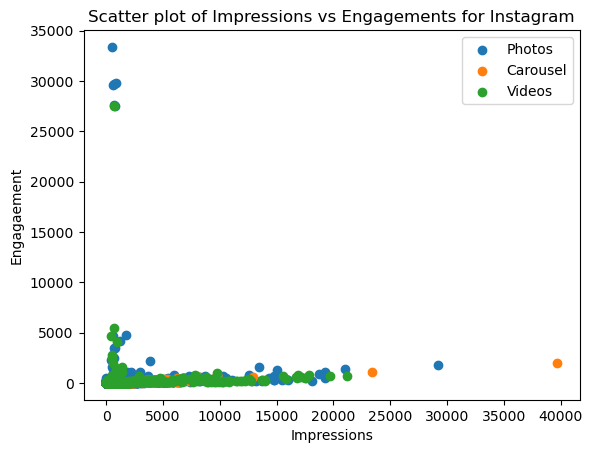

In [18]:
# Visualizing the relationship between Impressions and Engagements 
import matplotlib.pyplot as plt
import seaborn as sns

instagram_photos = df_instagram[df_instagram['Content Type'] == 'Photo'].reset_index(drop = True)
instagram_carousel = df_instagram[df_instagram['Content Type'] == 'Carousel'].reset_index(drop = True)
instagram_video = df_instagram[df_instagram['Content Type'] == 'Video'].reset_index(drop = True)

plt.scatter(instagram_photos['Impressions'], instagram_photos['Engagements'], label = 'Photos')
plt.scatter(instagram_carousel['Impressions'], instagram_carousel['Engagements'], label = 'Carousel')
plt.scatter(instagram_video['Impressions'], instagram_video['Engagements'], label = 'Videos')

plt.xlabel('Impressions')
plt.ylabel('Engagaement')
plt.legend()

plt.title('Scatter plot of Impressions vs Engagements for Instagram')
plt.show()

Engagement appears to remain relatively consistent across a range of Impressions. However there are lots of overlap of data points preventing detailed analysis. A sample will be generated from this dataset for further analysis.

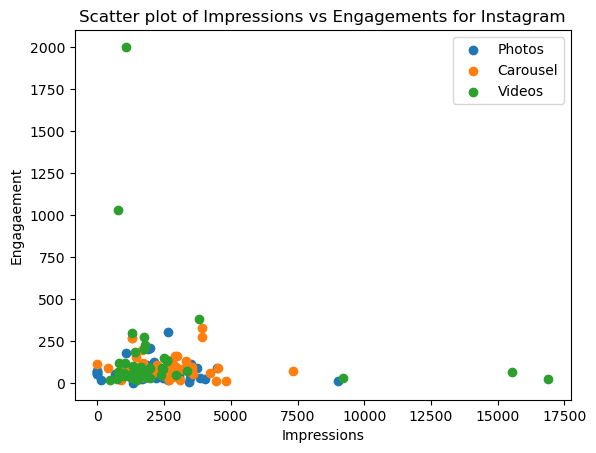

In [19]:
# Visualizing the relationship between Impressions and Engagements using a sample size

import numpy as np

np.random.seed(42) # for reproducibility
sample_size = 50

instagram_photos = df_instagram[df_instagram['Content Type'] == 'Photo'].reset_index(drop = True)
instagram_carousel = df_instagram[df_instagram['Content Type'] == 'Carousel'].reset_index(drop = True)
instagram_video = df_instagram[df_instagram['Content Type'] == 'Video'].reset_index(drop = True)

plt.scatter(instagram_photos.sample(sample_size)['Impressions'], instagram_photos.sample(sample_size)['Engagements'], label = 'Photos')
plt.scatter(instagram_carousel.sample(sample_size)['Impressions'], instagram_carousel.sample(sample_size)['Engagements'], label = 'Carousel')
plt.scatter(instagram_video.sample(sample_size)['Impressions'], instagram_video.sample(sample_size)['Engagements'], label = 'Videos')

plt.xlabel('Impressions')
plt.ylabel('Engagaement')
plt.legend()

plt.title('Scatter plot of Impressions vs Engagements for Instagram')
plt.show()


A sample size of 50 rows was chosen for each content type to improve visualization. Using the entire dataset led to substantial overlap, making it challenging to interpret the data effectively.

While one might anticipate that as Impressions increase, the number of engagement with the content should also increase (a positive correlation between Impressions and Engagement), our scatterplot analysis reveals a more nuanced picture. Specifically, for Instagram, Engagement appears to remain relatively consistent across a range of Impressions. Intriguingly, there are few instances where Engagement was exceptionally high, even when the content had relatively low Impressions and this was observed primarily within the 'Photos' content type.

### 1.2 Exploring the relationship between Impressions and Content Type


In [20]:
# using one way anova to determine the relationship between Impressions and Content Type
from scipy import stats
import statistics as stat

def anova(df, feature, label):
    group = df[feature].unique()
    grouped_list = []
    
    for i in group:
        yes_no_grouping = df[df[feature] == i][label]
        grouped_list.append(yes_no_grouping)
        
    return stats.f_oneway(*grouped_list)

anova(df_instagram, 'Content Type', 'Impressions')

F_onewayResult(statistic=36.705851261036536, pvalue=1.3094751833810808e-16)

The result of the one-way analysis of variance (ANOVA) test conducted indicates whether there is a statistically significant difference in Impressions among the different content types (Photos, Videos, and Carousels). 

1. **statistic**: This takes the mean of impressions for the three contenet types and checks if there is a major difference between these mean impressions in order to determine if there is a correlation or not. If the result is large, that means the distance between both means is large and there is a major difference in charges between the content types. If the value is low, then there isn't much difference between them.

2. **p-value**: The p-value is a measure of the probability that the observed differences in means between groups occurred by random chance. A lower p-value indicates stronger evidence against the null hypothesis (the assumption that there are no significant differences between groups).

   - The p-value is very close to zero (approximately 1.155e-17), which is much smaller than the conventional significance level (e.g., 0.05). This indicates that there is strong evidence to reject the null hypothesis.

Interpretation:
Based on the extremely low p-value, it can be concluded that there is a statistically significant difference in Impressions among the different content types (Photos, Videos, and Carousels).

- In other words, the Instagram content type has a significant impact on the number of Impressions

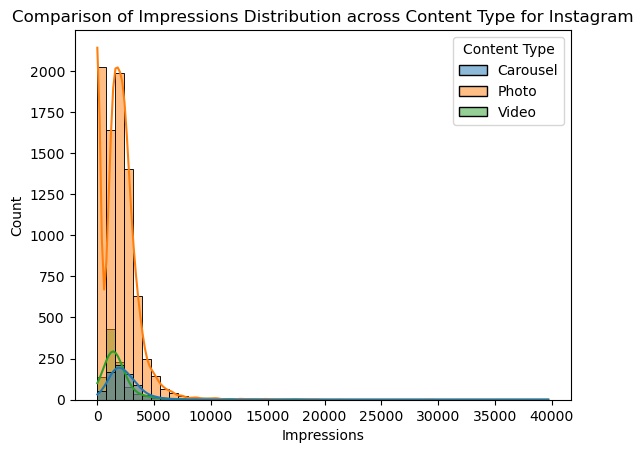

In [21]:
# Visualizing the relationship between Impressions and content type using histogram

sns.histplot(data = df_instagram, x ='Impressions', hue='Content Type', bins = 50, kde = True);

plt.title('Comparison of Impressions Distribution across Content Type for Instagram');

The histogram plot clearly illustrates that posts with photos tend to achieve a notably higher number of impressions compared to carousels and videos. This distinction is evident in the extended tail of the histogram, signifying that photos consistently receive more impressions across a wide range.

Furthermore, it's worth noting that the dataset contains a considerably larger number of photo posts compared to carousels and videos, which aligns with the observed trend of higher impressions for photo content.

### 1.3 Exploring the Content Type feature


In [22]:
df_instagram['Content Type'].value_counts()

Content Type
Photo       8256
Video       1002
Carousel     742
Name: count, dtype: int64

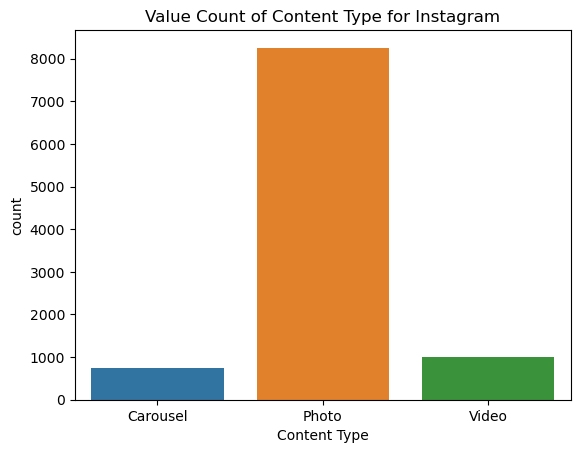

In [23]:
sns.countplot(data = df_instagram, x = 'Content Type')

plt.title('Value Count of Content Type for Instagram');

Photos are more frequently posted compared to other content types


# 2.EDA-for-Twitter

### 2.1 Exploring the relationship between Impressions and Engagement across Content Type


In [24]:
# Determing the correaltion coefficient between Impressions and Engagements
result = corr(df_twitter, 'Impressions','Engagements')
print('The correlation coefficient for Impressions and Enagagement on Twitter is {}'.format(result))

The correlation coefficient for Impressions and Enagagement on Twitter is 0.6200830972157487


A correlation coefficient of 0.6 indicates that there is a moderate relationship between Impressions and Engagements for Twitter

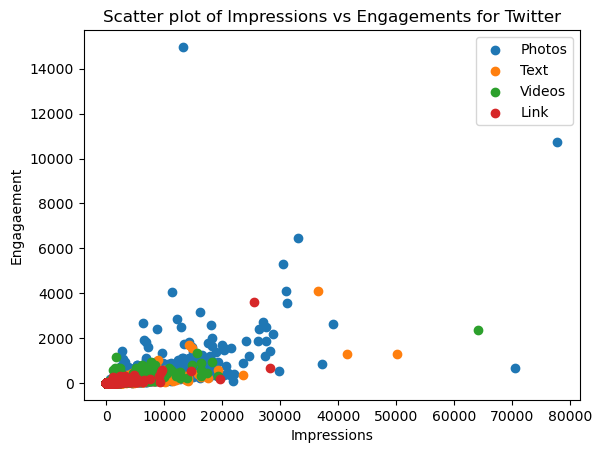

In [25]:
# Visualizing the relationship between Impressions and Engagements using Scatter Plot

twitter_photos = df_twitter[df_twitter['Content Type'] == 'Photo'].reset_index(drop = True)
twitter_text = df_twitter[df_twitter['Content Type'] == 'Text'].reset_index(drop = True)
twitter_video = df_twitter[df_twitter['Content Type'] == 'Video'].reset_index(drop = True)
twitter_link = df_twitter[df_twitter['Content Type'] == 'Link'].reset_index(drop = True)

plt.scatter(twitter_photos['Impressions'], twitter_photos['Engagements'], label = 'Photos')
plt.scatter(twitter_text['Impressions'], twitter_text['Engagements'], label = 'Text')
plt.scatter(twitter_video['Impressions'], twitter_video['Engagements'], label = 'Videos')
plt.scatter(twitter_link['Impressions'], twitter_link['Engagements'], label = 'Link')

plt.xlabel('Impressions')
plt.ylabel('Engagaement')
plt.legend()

plt.title('Scatter plot of Impressions vs Engagements for Twitter')
plt.show()



For Twitter, Engagement appears to slightly increase as the Impressions increase, However just like Instagram, there are few instances where Engagement was exceptionally high, even when the content had relatively low Impressions and this was observed primarily within the photos content type, also for one data point, a high impression, resulted a high engagement.

### 2.2 Exploring the relationship between Impressions and Content Type


In [26]:
anova(df_twitter, 'Content Type', 'Impressions')

F_onewayResult(statistic=45.07519329317043, pvalue=6.821174768775165e-29)

The Twitter content type has a significant impact on the number of Impressions

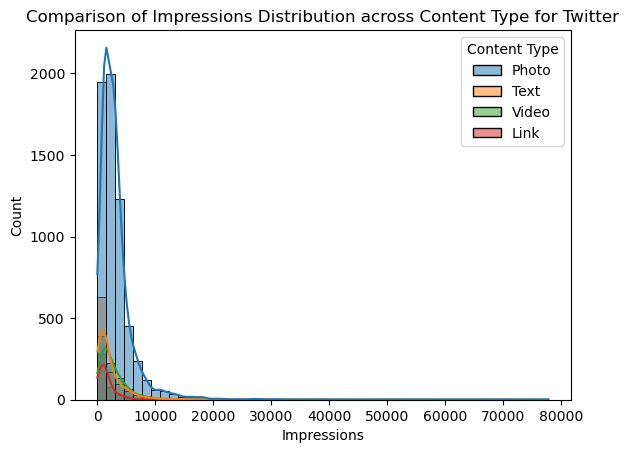

In [27]:
# Visualizing the relationship between Impressions and content type using histogram

sns.histplot(data = df_twitter, x ='Impressions', hue='Content Type', bins = 50, kde = True);

plt.title('Comparison of Impressions Distribution across Content Type for Twitter');

The histogram plot clearly illustrates that posts with photos tend to achieve a notably higher number of impressions compared to texts, videos and links. This distinction is evident in the extended tail of the histogram, signifying that photos consistently receive more impressions across a wide range.

Furthermore, it's worth noting that the dataset contains a considerably larger number of photo posts compared to texts, videos and links, which aligns with the observed trend of higher impressions for photo content.

### 2.3 Exploring the Content Type feature


In [28]:
df_twitter['Content Type'].value_counts()

Content Type
Photo    6213
Text     1018
Video     883
Link      415
Name: count, dtype: int64

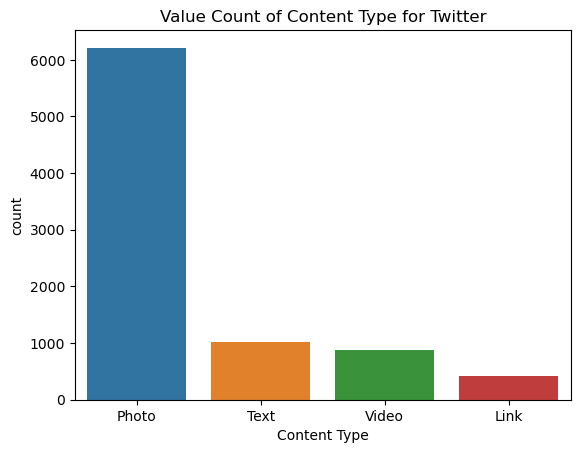

In [29]:
sns.countplot(data = df_twitter, x = 'Content Type')

plt.title('Value Count of Content Type for Twitter');

Photos are posted more frequently compared to other content types for Twitter.


# 3.EDA-for-Facebook

### 3.1 Exploring the relationship between Impressions and Engagement across Content Type


In [30]:
# Determing the correaltion coefficient between Impressions and Engagements
result = corr(df_facebook, 'Impressions','Engagements')
print('The correlation coefficient for Impressions and Enagagement on Facebook is {}'.format(result))

The correlation coefficient for Impressions and Enagagement on Facebook is 0.24522858935803596


A correlation coefficient of 0.2 indicates that there is a weak relationship between Impressions and Engagements for Facebook

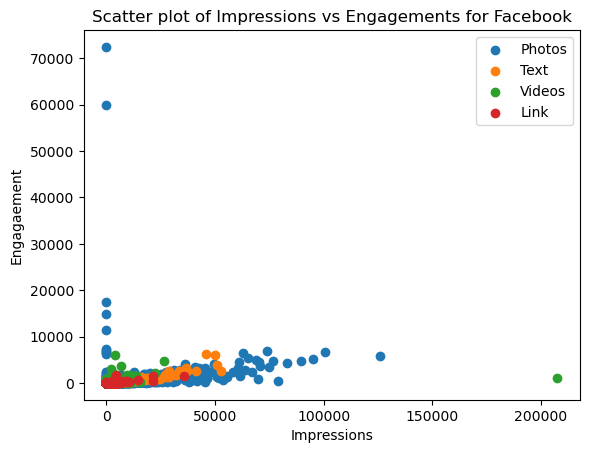

In [31]:
# Visualizing the relationship between Impressions and Engagements using Scatter Plot

facebook_photos = df_facebook[df_facebook['Content Type'] == 'Photo'].reset_index(drop = True)
facebook_text = df_facebook[df_facebook['Content Type'] == 'Text'].reset_index(drop = True)
facebook_video = df_facebook[df_facebook['Content Type'] == 'Video'].reset_index(drop = True)
facebook_link = df_facebook[df_facebook['Content Type'] == 'Link'].reset_index(drop = True)

plt.scatter(facebook_photos['Impressions'], facebook_photos['Engagements'], label = 'Photos')
plt.scatter(facebook_text['Impressions'], facebook_text['Engagements'], label = 'Text')
plt.scatter(facebook_video['Impressions'], facebook_video['Engagements'], label = 'Videos')
plt.scatter(facebook_link['Impressions'], facebook_link['Engagements'], label = 'Link')

plt.xlabel('Impressions')
plt.ylabel('Engagaement')
plt.legend()

plt.title('Scatter plot of Impressions vs Engagements for Facebook')
plt.show()



For Facebook, Engagement appears to remain relatively consistent across a range of Impressions. , However just like Instagram, there are few instances where Engagement was exceptionally high, even when the content had relatively low Impressions and this was observed primarily within the photos content type.

### 3.2 Exploring the relationship between Impressions and Content Type


In [32]:
anova(df_facebook, 'Content Type', 'Impressions')

F_onewayResult(statistic=83.89140153353425, pvalue=1.3748732925707688e-53)

The Facebook content type has a significant impact on the number of Impressions

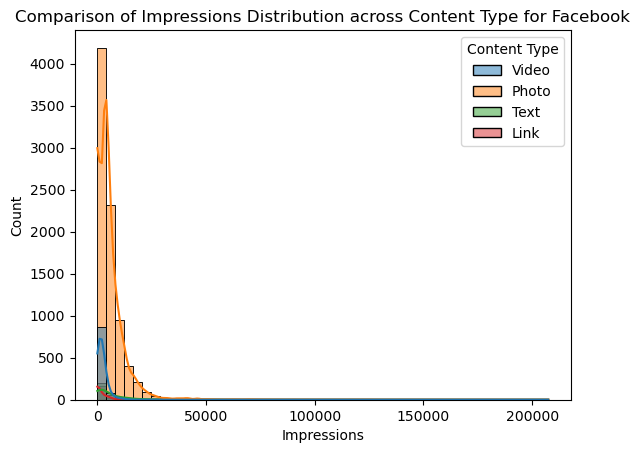

In [33]:
# Visualizing the relationship between Impressions and content type using histogram

sns.histplot(data = df_facebook, x ='Impressions', hue='Content Type', bins = 50, kde = True);

plt.title('Comparison of Impressions Distribution across Content Type for Facebook');

The histogram plot clearly illustrates that posts with photos tend to achieve a notably higher number of impressions compared to texts, videos and links. This distinction is evident in the extended tail of the histogram, signifying that photos consistently receive more impressions across a wide range.

Furthermore, it's worth noting that the dataset contains a considerably larger number of photo posts compared to texts, videos and links, which aligns with the observed trend of higher impressions for photo content.

### 3.3 Exploring the Content Type feature


In [34]:
df_facebook['Content Type'].value_counts()

Content Type
Photo    8308
Video     964
Text      339
Link      192
Name: count, dtype: int64

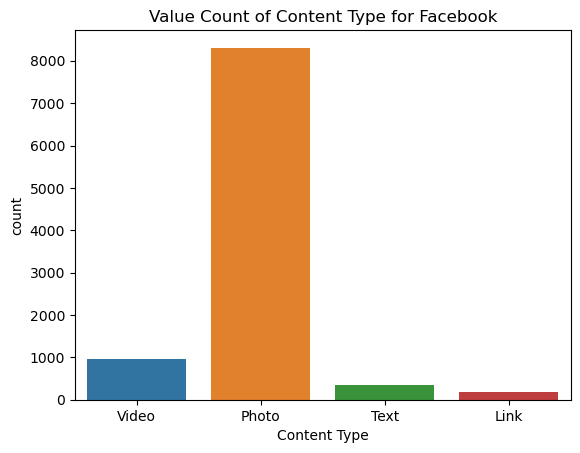

In [35]:
sns.countplot(data = df_facebook, x = 'Content Type')

plt.title('Value Count of Content Type for Facebook');

Photos are posted more frequently compared to other content types for Facebook

# 4.EDA-for-LinkedIn

### 4.1 Exploring the relationship between Impressions and Engagement across Content Type


In [36]:
# Determing the correaltion coefficient between Impressions and Engagements
result = corr(df_linkedin, 'Impressions','Engagements')
print('The correlation coefficient for Impressions and Enagagement on LinkedIn is {}'.format(result))

The correlation coefficient for Impressions and Enagagement on LinkedIn is 0.6753146856318724


A correlation coefficient of 0.67 indicates that there is a moderate relationship between Impressions and Engagements for LinkedIn

In [37]:
df_linkedin['Content Type'].unique()

array(['Photo', 'Text', 'Video', 'Poll', 'Document', 'Link'], dtype=object)

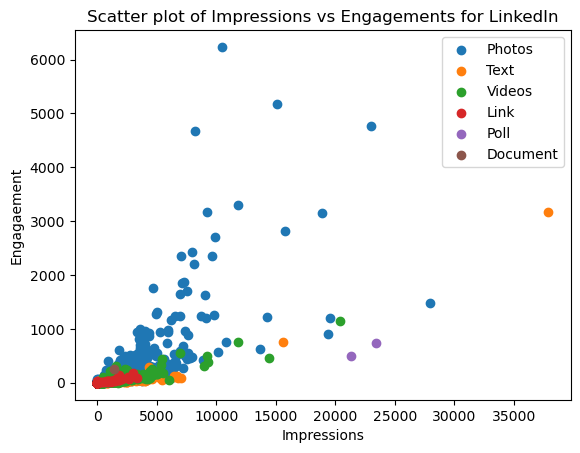

In [38]:
# Visualizing the relationship between Impressions and Engagements using Scatter Plot

linkedin_photos = df_linkedin[df_linkedin['Content Type'] == 'Photo'].reset_index(drop = True)
linkedin_text = df_linkedin[df_linkedin['Content Type'] == 'Text'].reset_index(drop = True)
linkedin_video = df_linkedin[df_linkedin['Content Type'] == 'Video'].reset_index(drop = True)
linkedin_link = df_linkedin[df_linkedin['Content Type'] == 'Link'].reset_index(drop = True)
linkedin_poll = df_linkedin[df_linkedin['Content Type'] == 'Poll'].reset_index(drop = True)
linkedin_document = df_linkedin[df_linkedin['Content Type'] == 'Document'].reset_index(drop = True)

plt.scatter(linkedin_photos['Impressions'], linkedin_photos['Engagements'], label = 'Photos')
plt.scatter(linkedin_text['Impressions'], linkedin_text['Engagements'], label = 'Text')
plt.scatter(linkedin_video['Impressions'], linkedin_video['Engagements'], label = 'Videos')
plt.scatter(linkedin_link['Impressions'], linkedin_link['Engagements'], label = 'Link')
plt.scatter(linkedin_poll['Impressions'], linkedin_poll['Engagements'], label = 'Poll')
plt.scatter(linkedin_document['Impressions'], linkedin_document['Engagements'], label = 'Document')

plt.xlabel('Impressions')
plt.ylabel('Engagaement')
plt.legend()

plt.title('Scatter plot of Impressions vs Engagements for LinkedIn')
plt.show()



For LinkedIn, Engagement appears to increase as the Impressions increase. It shows a positive correlation between Engagement and Instagram.

### 4.2 Exploring the relationship between Impressions and Content Type


In [39]:
anova(df_linkedin, 'Content Type', 'Impressions')

F_onewayResult(statistic=129.32657220356478, pvalue=5.313636945078376e-132)

The LinkedIn content type has a significant impact on the number of Impressions

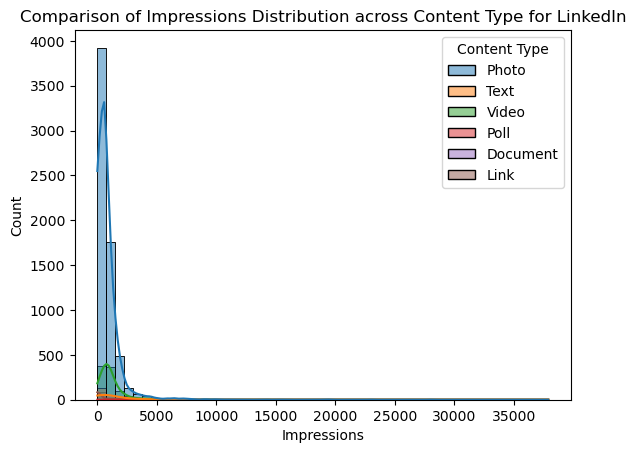

In [40]:
# Visualizing the relationship between Impressions and content type using histogram

sns.histplot(data = df_linkedin, x ='Impressions', hue='Content Type', bins = 50, kde = True);

plt.title('Comparison of Impressions Distribution across Content Type for LinkedIn');

The histogram plot clearly illustrates that posts with photos tend to achieve a notably higher number of impressions compared to texts, videos, links documents and polls. This distinction is evident in the extended tail of the histogram, signifying that photos consistently receive more impressions across a wide range.

Furthermore, it's worth noting that the dataset contains a considerably larger number of photo posts compared to texts, videos, links documents and polls which aligns with the observed trend of higher impressions for photo content.

### 4.3 Exploring the Content Type feature


In [41]:
df_linkedin['Content Type'].value_counts()

Content Type
Photo       6490
Video        923
Text         233
Link         110
Poll           2
Document       1
Name: count, dtype: int64

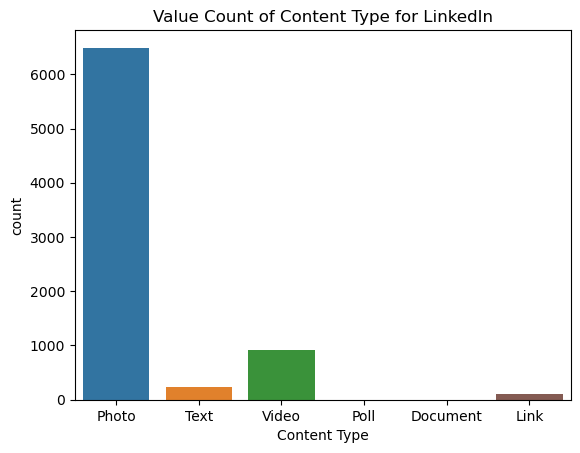

In [42]:
sns.countplot(data = df_linkedin, x = 'Content Type')

plt.title('Value Count of Content Type for LinkedIn');

Photos are posted more frequently compared to other content types for LinkedIn

___

# Gaining-Insights,Answering-Business-Questions-and-Providing-Recommendations

___

This section gives valuable insights by answering essential business questions related to engagement analysis, content analysis, sent by analysis and posting strategy across various social media platforms (Facebook, Instagram, LinkedIn, Twitter). It also provides tailored recommendations within each business question to guide strategies for improved customer engagement across these social media channels.

### Business Questions to Answer

1. **Engagement Analysis**:
   - What are the most engaging types of posts across all social media platforms?
   - Which platform (Facebook, Instagram, LinkedIn, Twitter) yields the highest engagement for the client?
   - Are there any noticeable trends in engagement rates over time, such as increasing likes or decreasing shares?
      - 1.3 a) Further analysis into the engagement trend of the years with the highest average engagement values
      - 1.3 b) Text Analysis of Post Column for top engaging post
      
      
      
2. **Sent By Analysis:** 
   - Examine if posts sent by certain individuals result in higher engagements



3. **Content Analysis**: 
   - Do certain content types resonate differently with the audience on different platforms?



4. **Posting Strategy:**
   - What are the peak times for user engagement on each social media platform?



# 1.Engagement-Analysis

### 1.1  What are the most engaging types of posts  for each social media platforms?

In [43]:
content_engagement_instagram = df_instagram.groupby('Content Type')['Engagement Rate (per Impression)'].mean().sort_values(ascending = False).round(2)

content_engagement_twitter = df_twitter.groupby('Content Type')['Engagement Rate (per Impression)'].mean().sort_values(ascending = False).round(2)

content_engagement_facebook = df_facebook.groupby('Content Type')['Engagement Rate (per Impression)'].mean().sort_values(ascending = False).round(2)

content_engagement_linkedin = df_linkedin.groupby('Content Type')['Engagement Rate (per Impression)'].mean().sort_values(ascending = False).round(2)

In [44]:
ig = pd.DataFrame({'Content Type for Instagram': content_engagement_instagram.index, 
              'Average Engagement Rate (per Impression)%': content_engagement_instagram.values})

tw = pd.DataFrame({'Content Type for Twitter': content_engagement_twitter.index, 
              'Average Engagement Rate (per Impression)%': content_engagement_twitter.values})

fb = pd.DataFrame({'Content Type for Facebook': content_engagement_facebook.index, 
              'Average Engagement Rate (per Impression)%': content_engagement_facebook.values})

lk = pd.DataFrame({'Content Type for LinkedIn': content_engagement_linkedin.index, 
              'Average Engagement Rate (per Impression)%': content_engagement_linkedin.values})

display(ig, tw, fb, lk)

,Content Type for Instagram,Average Engagement Rate (per Impression)%
0,Photo,36.73
1,Video,16.76
2,Carousel,3.53


,Content Type for Twitter,Average Engagement Rate (per Impression)%
0,Video,3.42
1,Photo,2.78
2,Link,1.85
3,Text,1.70


,Content Type for Facebook,Average Engagement Rate (per Impression)%
0,Video,6.69
1,Photo,3.93
2,Text,3.02
3,Link,1.69


,Content Type for LinkedIn,Average Engagement Rate (per Impression)%
0,Document,18.08
1,Link,7.23
2,Photo,6.44
3,Text,3.18
4,Poll,2.73
5,Video,2.24


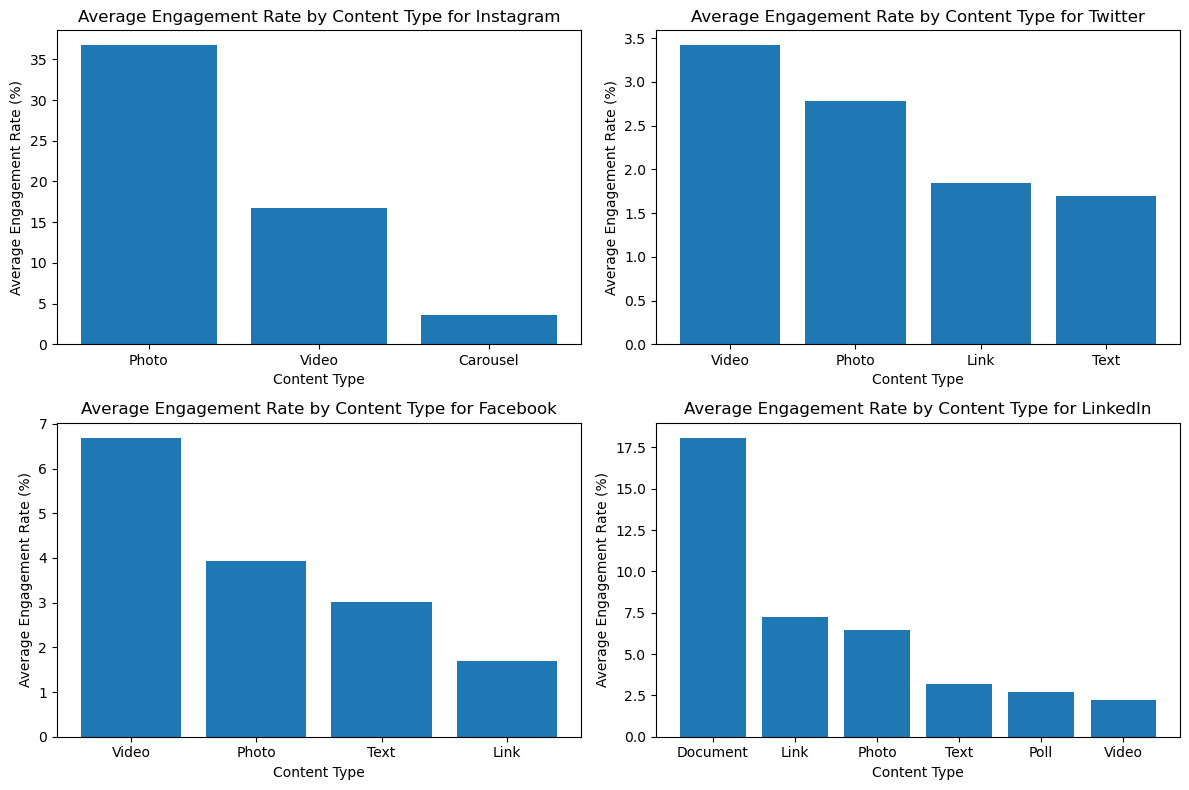

In [45]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the first bar chart on the first subplot
axes[0,0].bar(content_engagement_instagram.index, content_engagement_instagram.values)
axes[0,0].set_title('Average Engagement Rate by Content Type for Instagram')
axes[0,0].set_xlabel('Content Type')
axes[0,0].set_ylabel('Average Engagement Rate (%)')  

# Plot the second bar chart on the second subplot
axes[0,1].bar(content_engagement_twitter.index, content_engagement_twitter.values)
axes[0,1].set_title('Average Engagement Rate by Content Type for Twitter')
axes[0,1].set_xlabel('Content Type')
axes[0,1].set_ylabel('Average Engagement Rate (%)')  

# Plot the third bar chart on the third subplot
axes[1,0].bar(content_engagement_facebook.index, content_engagement_facebook.values)
axes[1,0].set_title('Average Engagement Rate by Content Type for Facebook')
axes[1,0].set_xlabel('Content Type')
axes[1,0].set_ylabel('Average Engagement Rate (%)')  

# Plot the fourth bar chart on the fourth subplot
axes[1,1].bar(content_engagement_linkedin.index, content_engagement_linkedin.values)
axes[1,1].set_title('Average Engagement Rate by Content Type for LinkedIn')
axes[1,1].set_xlabel('Content Type')
axes[1,1].set_ylabel('Average Engagement Rate (%)')  

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

## Insights

This analysis shows how users interacted with different types of content on the four social media platforms. To make it clear:

- **Impression**: means how many times a piece of content was seen.

- **Engagement**: refers to any way people interact with the content, like liking, commenting, or sharing it.

- **Engagement Rate per Impression**: tells us the percentage of people who engaged with a post after they saw it.

The average engagement rates for each content type for these platforms were populated and visualized  using bar charts. Here is what was found for each platform:

- **Instagram**: Most people interacted with photos posted. On average, 36.73% of viewers that saw the photos post, engaged with them. 

- **Twitter**: On Twitter, videos were the most engaging, On average, 3.42% of people that saw the videos posted interacted with them.

- **Facebook**: For Facebook, videos also led with a 6.69% average engagement rate.

- **LinkedIn**: On LinkedIn, documents had the highest average engagement rate at 18.08%.

## Recommendations

Based on the analysis of user engagement with different types of content on various social media platforms, here are some recommendations for content strategy:

1. **Instagram**:
   - Focus on posting more photos, as they have the highest average engagement rate (36.73%).
   - Ensure that your Instagram photos are visually appealing, high-quality, and relevant to your target audience.

2. **Twitter**:
   - Prioritize video content on Twitter, as it has the highest average engagement rate (3.42%).
   - Consider creating short, attention-grabbing videos that convey the message effectively in a brief format.

3. **Facebook**:
   - Continue to invest in video content for Facebook, as it also leads in average engagement rate (6.69%).
   - Experiment with live videos and interactive content to encourage more likes, comments, and shares.

4. **LinkedIn**:
   - Given that documents have the highest average engagement rate on LinkedIn (18.08%), consider sharing informative documents, whitepapers, or reports related to your industry or expertise.
   - Leverage LinkedIn's professional context to share in-depth content that provides value to your network.

### Additional Recommendations:
- **Audience Insights**: Regularly analyze the performance of your content on each platform to understand what resonates best with your specific audience. Adjust your content strategy based on these insights.

- **Engagement Techniques**: Encourage engagement on your posts by using effective calls to action (CTAs) and interactive elements like polls, quizzes, and questions.

- **Platform-Specific Features**: Take advantage of each platform's unique features. For example, on Instagram, make use of Stories and Reels. On LinkedIn, leverage LinkedIn Pulse for publishing articles.


### 1.2  Which platform (Facebook, Instagram, LinkedIn, Twitter) yields the highest engagement rate for the client?

In [46]:
instagram = df_instagram['Engagement Rate (per Impression)'].mean().round(2)
twitter = df_twitter['Engagement Rate (per Impression)'].mean().round(2)
facebook = df_facebook['Engagement Rate (per Impression)'].mean().round(2)
linkedin = df_linkedin['Engagement Rate (per Impression)'].mean().round(2)

In [47]:
data = {'Platforms': ['Instagram', 'Twitter', 'Facebook', 'LinkedIn'],
        'Average Engagaement Rate %': [instagram, twitter, facebook, linkedin]}

engagement_rate_all_platforms = pd.DataFrame(data)

# sort in descending order
engagement_rate_all_platforms.sort_values(by = 'Average Engagaement Rate %', ascending = False, inplace = True)

# reset the indexing
engagement_rate_all_platforms.set_index('Platforms', inplace = True)

engagement_rate_all_platforms

,Average Engagaement Rate %
Platforms,
Instagram,32.26
LinkedIn,5.85
Facebook,4.13
Twitter,2.68


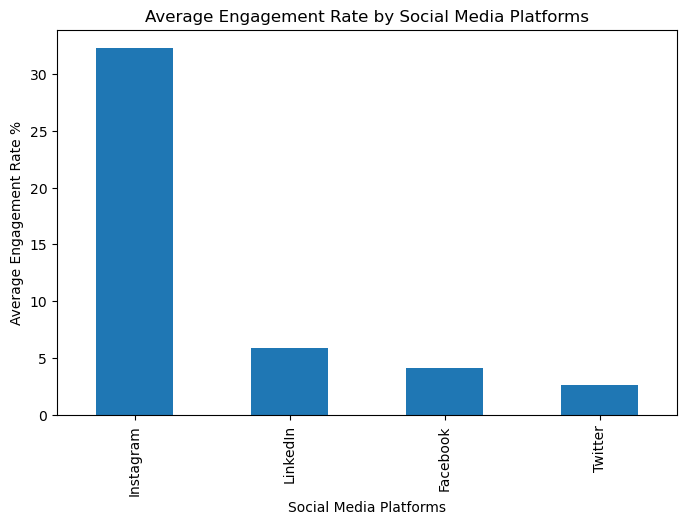

In [48]:
fig, ax = plt.subplots(figsize = (8,5))

engagement_rate_all_platforms.plot.bar(ax = ax, legend = False);
plt.xlabel('Social Media Platforms')
plt.ylabel('Average Engagement Rate %')
plt.title('Average Engagement Rate by Social Media Platforms');

plt.show()


## Insights

These results show the average engagement rates as percentages for each platform. 
- Instagram has the highest average engagement rate at 32.27%
- Followed by LinkedIn with 5.85%
- Facebook with 4.13%
- Twitter recorded the lowest engagement rate, with 2.68% on average. 

## Recommendations
Based on the insight that Instagram has the highest average engagement rate, followed by LinkedIn, Facebook, and Twitter, you can make the following recommendations:

1. **Leverage Instagram**: Given that Instagram has the highest average engagement rate of 32.27%, consider allocating more resources and content strategy to this platform. Create visually appealing and engaging content that resonates with your audience on Instagram.

2. **Focus on LinkedIn**: LinkedIn comes in second with an average engagement rate of 5.85%. This platform is particularly effective for professional and B2B content. Continue to build a strong presence on LinkedIn by sharing industry insights, thought leadership, and relevant business updates.

3. **Optimize Facebook**: While Facebook's average engagement rate is lower at 4.13%, it still has a substantial user base. To improve engagement on Facebook, consider experimenting with different content formats, posting times, and targeting options to better reach your audience.

4. **Evaluate Twitter Strategy**: Twitter has the lowest average engagement rate at 2.68%. Review your Twitter content strategy to see if it aligns with the platform's fast-paced and real-time nature. Focus on trending topics, engage with relevant conversations, and use relevant hashtags to increase visibility.

### Additional Recommendations
- **Diversify Content**: Each platform has its own unique audience and content preferences. Tailor your content for each platform, ensuring it aligns with the expectations and behaviors of users on that platform.

- **Monitor and Analyze**: Continuously monitor the engagement metrics on each platform. Analyze what types of content and posting strategies perform best. Adjust your approach based on data-driven insights.

- **Consider Paid Promotion**: Consider allocating budget for paid advertising on platforms where engagement rates are lower. Paid promotion can help increase visibility and reach a wider audience.

- **Engage with the Audience**: Respond promptly to comments and messages on all platforms. Engaging with your audience fosters a sense of community and can boost engagement rates.


### 1.3 Are there any noticeable trends in engagements over time for each social media platform?

In [49]:
def engagement_trend(df):
    trend = df[['Date', 'Engagements']].copy()

    #Extract the year from the data column and save resuts in a new column
    trend['year'] = trend['Date'].dt.year
    
    #Drop date column
    trend.drop('Date', axis =1, inplace = True)

    #Group the Engagaement by year and find the sum of engagements for each year
    trend = trend.groupby('year')['Engagements'].mean().round(0)
    

    # Show result
    return trend

In [50]:
instagram_engagament_trend = engagement_trend(df_instagram)
twitter_engagament_trend = engagement_trend(df_twitter)
facebook_engagament_trend = engagement_trend(df_facebook)
linkedin_engagament_trend = engagement_trend(df_linkedin)

In [51]:
# creating a table to show the average number of engagament for each year across all social media platforms

ig_trend = pd.DataFrame({'Year': instagram_engagament_trend.index, 
              'Average Number of Engagement for Instagram': instagram_engagament_trend.values})

tw_trend = pd.DataFrame({'Year': twitter_engagament_trend.index, 
              'Average Number of Engagement for Twitter': twitter_engagament_trend.values})

fb_trend = pd.DataFrame({'Year': facebook_engagament_trend.index, 
              'AverageNumber of Engagement for Facebook': facebook_engagament_trend.values})

lk_trend = pd.DataFrame({'Year': linkedin_engagament_trend.index, 
              'Average Number of Engagement for LinkedIn': linkedin_engagament_trend.values})

table1 = pd.concat([ig_trend, lk_trend], axis=1)
table2 = pd.concat([tw_trend, fb_trend], axis=1)

# Display the 2x2 tables
display(table1, table2)


,Year,Average Number of Engagement for Instagram,Year,Average Number of Engagement for LinkedIn
0,2014,7.0,2014,0.0
1,2015,27.0,2015,0.0
2,2016,52.0,2016,0.0
3,2017,77.0,2017,0.0
4,2018,99.0,2018,36.0
5,2019,108.0,2019,63.0
6,2020,102.0,2020,41.0
7,2021,68.0,2021,38.0
8,2022,214.0,2022,61.0
9,2023,56.0,2023,44.0


,Year,Average Number of Engagement for Twitter,Year,AverageNumber of Engagement for Facebook
0,2013,0.0,2013,48.0
1,2014,5.0,2014,0.0
2,2015,155.0,2015,127.0
3,2016,55.0,2016,162.0
4,2017,63.0,2017,277.0
5,2018,87.0,2018,178.0
6,2019,129.0,2019,282.0
7,2020,196.0,2020,318.0
8,2021,111.0,2021,123.0
9,2022,51.0,2022,145.0


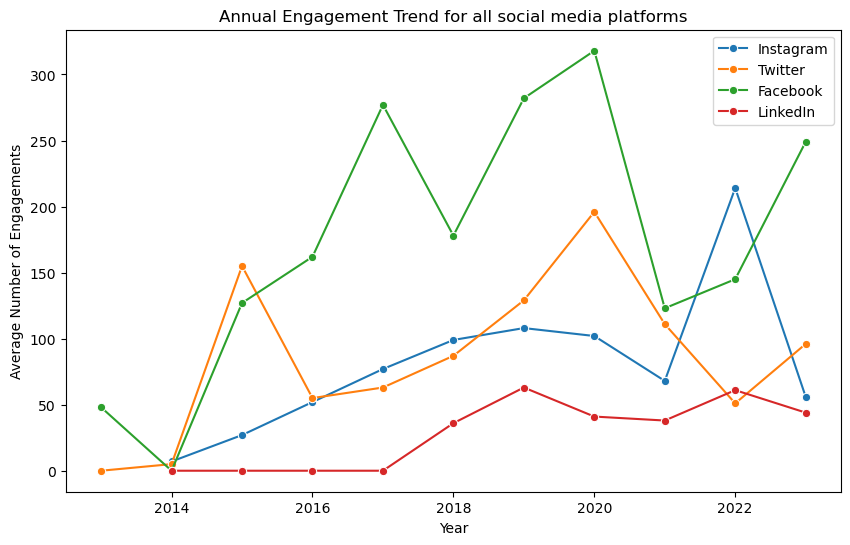

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x = instagram_engagament_trend.index, y = instagram_engagament_trend.values, marker = 'o', label = 'Instagram', ax = ax)
sns.lineplot(x = twitter_engagament_trend.index, y = twitter_engagament_trend.values, marker = 'o', label = 'Twitter', ax = ax)
sns.lineplot(x = facebook_engagament_trend.index, y = facebook_engagament_trend.values, marker = 'o', label = 'Facebook', ax = ax)
sns.lineplot(x = linkedin_engagament_trend.index, y = linkedin_engagament_trend.values, marker = 'o', label = 'LinkedIn', ax = ax)

plt.xlabel('Year')
plt.ylabel('Average Number of Engagements')
plt.title('Annual Engagement Trend for all social media platforms')
plt.legend()

plt.show()

## Insights

**Instagram:**
- Instagram's average engagement steadily increased over the years, starting at 7 in 2014 and peaking at 214 in 2022.
- There was a slight dip in average engagement in 2021, dropping to 68, but it rebounded in 2022.
- The dip in Instagram's average engagement in 2023 (56) should be viewed with caution as the data available for this year only goes up to July. It's possible that the engagement could pick up later in the year, and the lower value may not reflect the entire year's performance.

**Twitter:**
- Twitter's average engagement fluctuated over the years but generally showed an upward trend.
- A high engagement was observed in 2015 with 155, followed by a drop in 2016, and then a significant increase in 2020 to the highest engagement at 196.
- Similar to Instagram, the 2023 engagement data for Twitter (96) is limited to the first half of the year. As the data only goes up to July, it's important to consider that engagement trends for the latter half of the year is not be represented in this value.

**Facebook:**
- Facebook had a significant spike in engagement from 2013 to 2017, going from 48 to 277, which indicates a period of rapid growth.
- After 2017, the engagement on Facebook fluctuated but remained relatively high, with 2020 showing the highest average engagement of 318.
- Facebook's 2023 engagement value (249) might also be influenced by the fact that the data only goes up to July.  It is necessary to consider that the engagement trend for the second half of the year is not accounted for in this figure.

**LinkedIn:**
- LinkedIn's engagement remained at 0 from 2014 to 2017, suggesting a lack of engagement data for those years.
- There was a notable increase in engagement in 2018 (36) and 2019 (63), indicating a growing presence on the platform. Highest average engagement was noticed in 2019 with (63) 
- The 2023 engagement rate for LinkedIn (44) is based on data up to July, and it's essential to recognize that this value does not reflect the platform's engagement for the entire year. 

**Overall Insights:**
- Instagram has seen significant growth in engagement, but there was a slight drop in 2021, which could be a concern.
- Twitter has experienced fluctuations, with 2023 showing a stable level of engagement compared to previous years.
- Facebook had a remarkable growth period from 2013 to 2017 and has maintained relatively high engagement since then.
- LinkedIn initially had no engagement data but started to see growth in engagement from 2018 onwards, with relatively consistent rates in recent years.



> ###  1.3 a) Further analysis into the engagement trend of the years with the highest average engagement values

In order to gain deeper insights, the years that exhibited the highest average engagement values for the four major social media networks: Instagram, Twitter, Facebook, and LinkedIn will be investigated.

- Instagram - Year 2022 had the highest average engagement value of 214
- Twitter - Year 2020 had the highest average engagement value of 196
- Facebook - Year 2020 had the highest average engagement value of 318
- Linkedin - Year 2018 had the highest average engagement values of 63 



In [53]:
def monthly_engagement(df, year):

    df1 = df.copy()

    # Extract the year and month from the 'Date' column
    df1['year'] = df1['Date'].dt.year
    df1['month'] = df1['Date'].dt.month

    # Filter the DataFrame for the year 
    df1_year_2022 = df1[df1['year'] == year]

    # Group by month and calculate the mean of 'Engagements'
    monthly_engagement_avg = df1_year_2022.groupby('month')['Engagements'].mean()
    
    return monthly_engagement_avg


instagram_monthly_engagement_2022 = monthly_engagement(df_instagram, 2022)
twitter_monthly_engagement_2020 = monthly_engagement(df_twitter, 2020)
facebook_monthly_engagement_2020 = monthly_engagement(df_facebook, 2020)
linkedin_monthly_engagement_2018 = monthly_engagement(df_linkedin, 2018)

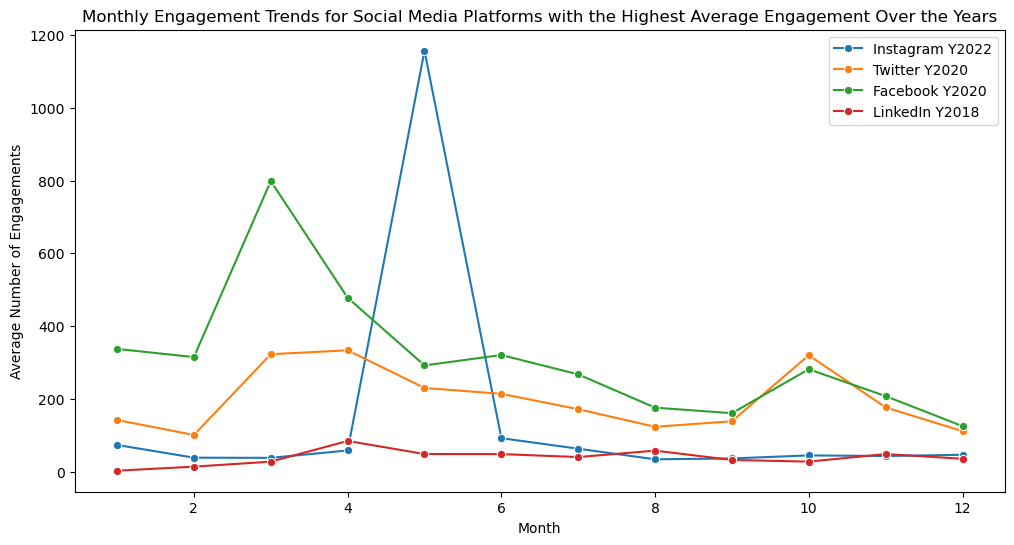

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x = instagram_monthly_engagement_2022.index, y = instagram_monthly_engagement_2022.values, marker = 'o', label = 'Instagram Y2022', ax = ax)
sns.lineplot(x = twitter_monthly_engagement_2020.index, y = twitter_monthly_engagement_2020.values, marker = 'o', label = 'Twitter Y2020', ax = ax)
sns.lineplot(x = facebook_monthly_engagement_2020.index, y = facebook_monthly_engagement_2020.values, marker = 'o', label = 'Facebook Y2020', ax = ax)
sns.lineplot(x = linkedin_monthly_engagement_2018.index, y = linkedin_monthly_engagement_2018.values, marker = 'o', label = 'LinkedIn Y2018', ax = ax)

plt.xlabel('Month')
plt.ylabel('Average Number of Engagements')
plt.title('Monthly Engagement Trends for Social Media Platforms with the Highest Average Engagement Over the Years')
plt.legend()

plt.show()

## Insights

- **Instagram** had its highest average engagement in 2022, with May being the standout month, possibly due to specific content or campaigns during that time.
- **Twitter** saw its highest average engagement in 2020, with March, April and October being exceptionally high, indicating that those months might have been strategically important.
- **Facebook's** peak average engagement was in 2020, with a significant spike in March, suggesting that this could have been a key period for the client's Facebook strategy.
- **LinkedIn** had its highest average engagement in 2018, with April standing out as the month with notably higher average engagement.

> ###  1.3 b) Further Analysis: Text Analysis of Post Column

**Within the 'Post' column of the dataset, conduct a text analysis on the rows corresponding to the highest average engagement month and year for the selected social media platform. The objective is to identify frequently used words or hashtags within the content of these posts**

- Instagram - May 2022
- Twitter - March, April, October 2020
- Facebook - March 2020
- LinkedIn - April 2018

In [55]:
# This function creates a filtered datatframe for each platform-month-year combination

def filter_dataframe(df, platform, year, month):
    df1 = df.copy()
    df1 = df1[df1['Network'] == platform]
    df1['month'] = df1['Date'].dt.month
    df1['year'] = df1['Date'].dt.year

    result = df1[(df1['month'] == month) & (df1['year'] == year)]
    
    return result

ig_may_2022 = filter_dataframe(df, 'Instagram', 2022, 5)
tw_march_2020 = filter_dataframe(df, 'Twitter', 2020, 3)
tw_april_2020 = filter_dataframe(df, 'Twitter', 2020, 4)
tw_oct_2020 = filter_dataframe(df, 'Twitter', 2020, 10)
fb_march_2020 = filter_dataframe(df, 'Facebook', 2020, 3)
lk_april_2018 = filter_dataframe(df, 'LinkedIn', 2018, 4)

In [56]:
# This function extracts most frequently used words and hastags in the post section of the above month-year combination

def post_analysis(df):

    from collections import Counter
    from nltk.corpus import stopwords


    # Concatenate the 'Post' column into a single string
    all_posts_text = ' '.join(df['Post'])

    # split the text into words
    words = all_posts_text.split()
    
    # Get list of english stop words 
    stop_words = set(stopwords.words('english'))

    # Remove stop words from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]


    # Get the words without hashtags and their count
    regualar_words = [word for word in filtered_words if not word.startswith('#')]
    regular_word_counter = Counter(regualar_words)

    # Get the words with hashtags and their count
    hashtags = [word for word in filtered_words if word.startswith('#')]
    hashtag_counter = Counter(hashtags)

    # Get the most common regular words and hashtags
    most_common_words = regular_word_counter.most_common(10)
    most_common_hashtags = hashtag_counter.most_common(20)
    
    # Get only the text string and not its count
    most_common_words = [word for word, count in regular_word_counter.most_common(10)]
    most_common_hashtags = [word for word, count in hashtag_counter.most_common(20)]
    
    # join both results into one list
    combined_list = most_common_words + most_common_hashtags
    
    # Join the elements of the combined list into a single string separated by spaces
    result_string = ','.join(combined_list)
   
    # Return both results as lists of words
    return combined_list

In [57]:
instagram_popular_words_hastags = post_analysis(ig_may_2022)
twitter_popular_words_hastags1 = post_analysis(tw_march_2020)
twitter_popular_words_hastags2 = post_analysis(tw_april_2020)
twitter_popular_words_hastags3 = post_analysis(tw_oct_2020)
facebook_popular_words_hastags = post_analysis(fb_march_2020)
linkedin_popular_words_hastags = post_analysis(lk_april_2018)

**Popular words and hashtags for most engaging posts on Instagram**

In [58]:
instagram_popular_words_hastags = ','.join(instagram_popular_words_hastags) # show result in horizontal format 
instagram_popular_words_hastags

'@stanbicibtc,Reposted,Stanbic,Visit,IBTC,Repost,———,get,name,years,#ITCANBE,#mydreamscanbe,#MyDreamsCanBe,#itcanbe,#GoForIt,#mydreamcanbe,#InsuranceCoverMe,#GoForLife,#GoForMore,#stanbicibtc,#ITCANBE\u200b,#Reward4Saving2,#MyDreamCanBe,#icanbe,#StartWithZero,#LATTES,#GoForIt\u200b,#ItCanBe,#SDG3,#GoodHealthandWellbeing'

**Popular words and hashtags for most engaging posts on Twitter**

In [59]:
# concatenate all the results for the 3 top month-year combination
twitter_popular_words_hastags = twitter_popular_words_hastags1 + twitter_popular_words_hastags2 + twitter_popular_words_hastags3
# remove duplicates and save result as a list
twitter_popular_words_hastags = list(set(twitter_popular_words_hastags))
twitter_popular_words_hastags = ','.join(twitter_popular_words_hastags)
twitter_popular_words_hastags

'#909FanGeng,#PowerUpMonday,#EasterLoveGeng,#BookwormGeng,#StayHome.,know,#ITCANBE,Join,us,#BestInsuranceDeals,Stanbic,contact,#EachforEqual,#Trivia,#FutureMe,Please,winners!,Geng,access,#ScamAlert.,details,#StayHome,#DataRecapture,909,account,#October1st,#StanbicIBTCFGNBondsFAQ,#staysafegeng,#StayInBusiness,#TheWeddingSeries,IBTC,#Geng,#NGRALG,01,#CustomerServiceWeek,send,#ShareWithAFriendChallenge,#MotivationMonday,email,#HeForShe,#Letsrebuildtogether,#COVID19,#HappenToLife,#StayStrong,#Ramadan,#StanbicIBTCPMI,#MoneySafe,get,#CleanHandsGeng,via,#StanbicIBTC,#MondayMotivation,#APPyness,#ThinkSafety,#TagYourGeng,#LikeAHero,phone,#StanbicIBTCGeng,help,#StaySafe,#BlueTalks,#ItCanBe,business,#SavingsSureGeng,period.,#WealthWednesday,#InvestmentClubGeng,#SIBTCTheWeddingSeries,#EidMaulud,#IndependenceDay'

**Popular words and hashtags for most engaging posts on Facebook**

In [60]:
facebook_popular_words_hastags = ','.join(facebook_popular_words_hastags)
facebook_popular_words_hastags

'email,get,Geng,Stanbic,IBTC,details,number,01,contact,phone,#EasterLoveGeng,#StanbicIBTCGeng,#909FanGeng,#InvestmentClubGeng,#SavingsSureGeng,#BookwormGeng,#CleanHandsGeng,#BookWormGeng,#Trivia,#investmentClubGeng,#SavingSureGeng,#MondayMotivation,#WealthWednesday,#APPyness,#BestInsuranceDeals,#HappenToLife,#HeForShe,#PowerUpMonday,#COVID19Tips,#NaijaLife'

**Popular words and hashtags for most engaging posts on LinkedIn**

In [61]:
linkedin_popular_words_hastags = ','.join(linkedin_popular_words_hastags)
linkedin_popular_words_hastags

'us,child,also,-,Autism,get,insurance,make,today.,life,#WealthWednesday,#MotivationMonday,#TopReads,#investments,#CareerTip,#TopRead,#HappenToLife,#WorldMalariaDay2018,#ReadyToBeatMalaria,#StanbicIBTC,#tradefinance,#motivationmonday,#MerciArsene,#WengerIn,#TBT,#WealthWednesday,,#TopReads.,#Insurance,#SMETip,#realestate'

## Insights


## Instagram:
1. **Brand Presence**: The presence of terms like '@stanbicibtc,' 'Stanbic,' and 'IBTC' suggests that the Instagram posts are related to Stanbic IBTC, which is likely a financial or banking institution. The repetition of these terms indicates a strong focus on branding and promotion of the company.

2. **Engagement Strategies**: The use of words like 'Reposted' and 'Repost' suggests that the account is actively engaging with its audience by sharing and reposting content. This is a common strategy to boost engagement and build a sense of community.

3. **Encouragement and Motivation**: Hashtags like '#ITCANBE,' '#mydreamscanbe,' '#GoForIt,' and '#icanbe' convey a message of motivation and encouragement. These hashtags may be used to inspire followers to pursue their dreams and goals.

4. **Financial Services**: Phrases like '#InsuranceCoverMe' and '#Reward4Saving2' indicate a focus on financial services, possibly insurance and savings products. This suggests that the post content is about its financial offerings.

5. **Lifestyle and Wellness**: The hashtags '#LATTES' and '#SDG3' seem unrelated to banking, suggesting that the account may also share content related to lifestyle (possibly coffee or beverages) and Sustainable Development Goal 3, which is about good health and well-being.

### Recommendations to improve user engagement on Stanbic IBTC's Instagram posts:

1. Maintain consistent branding with brand-related terms like '@stanbicibtc.'
2. Diversify content to include financial services, lifestyle, and wellness topics.
3. Use motivational content and hashtags to inspire followers.
4. Encourage user-generated content and share it with credits.
5. Create interactive posts like polls and quizzes.
6. Share educational content about financial services.
7. Share success stories of satisfied customers.
8. Experiment with relevant and trending hashtags.


## Twitter:
1. **Financial and Banking Focus**: Hashtags and words like 'StanbicIBTC', 'IBTC', 'details', 'access', and 'account' suggest a financial or banking theme. It's likely that there is a significant discussion or engagement related to Stanbic IBTC Bank, its services, and related financial topics.

2. **Engagement Campaigns**: Hashtags like '#StayStrong', '#StaySafe', '#MotivationMonday', and '#MondayMotivation' indicate that there is a focus on motivational and supportive content. These are often used in engagement campaigns to inspire or uplift the audience.

3. **Seasonal and Event-Based Hashtags**: Hashtags like '#Ramadan', '#EasterLoveGeng', '#IndependenceDay', and '#CustomerServiceWeek' suggest that the content includes posts related to specific events, holidays, and seasons. This indicates that the content is being curated to align with trending topics and events.

4. **Community and Social Engagement**: Hashtags like '#HeForShe', '#Letsrebuildtogether', and '#EachforEqual' indicate a focus on social issues and community engagement. These hashtags may be used to support or raise awareness about various social causes.

5. **COVID-19 Related Hashtags**: Hashtags like '#COVID19', '#StayHome', and '#StaySafe' suggest that there has been discussion and engagement related to the COVID-19 pandemic. This could include safety measures, updates, or support for affected individuals.

6. **Promotions and Campaigns**: Hashtags like '#BestInsuranceDeals', '#MoneySafe', and '#SavingsSureGeng' suggest that there might be promotions, offers, or campaigns related to financial products or services.


### Recommendations to  improve user engagement on Stanbic IBTC's Twitter posts:

1.  Diversify content to cover various topics.
2. Use engagement campaigns and relevant hashtags.
3. Capitalize on seasonal and event-related posts.
4. Incorporate social causes and community engagement.
5. Share COVID-19 updates if relevant.
6. Promote financial products and promotions.
7. Share educational and informative content.
8. Create interactive posts and challenges.

## Facebook:
1. **Engagement with Financial Services**: Words like 'email,' 'get,' 'Stanbic,' 'IBTC,' 'details,' 'number,' and 'contact' suggest that posts related to financial services and contacting institutions like Stanbic IBTC may be popular and engaging. Users seem to be interested in getting information and contacting these services.

2. **Phone Contact and Customer Queries**: The presence of 'phone' and terms related to contact details ('email,' 'number,' 'contact') indicates that users may be engaging with posts that provide customer service information or ways to reach out to businesses or organizations.

3. **Hashtags for Engagement**: The hashtags like '#EasterLoveGeng,' '#StanbicIBTCGeng,' '#909FanGeng,' and others suggest that using specific hashtags related to a particular group or campaign ('Geng' in this case) can help increase engagement. Users may be interested in content related to these hashtags or groups.

4. **Financial Planning and Investment**: Hashtags like '#InvestmentClubGeng' and '#SavingsSureGeng' indicate that posts related to investment and savings clubs may be engaging for your audience. This suggests an interest in financial planning and wealth management.

5. **Motivational Content**: Hashtags like '#MondayMotivation' and '#WealthWednesday' suggest that motivational and inspirational content may also resonate with your audience. These hashtags are often used to share positive and motivating messages.

6. **Gender Equality**: The hashtag '#HeForShe' suggests that posts related to gender equality and empowerment may also engage your audience. This could be an important topic of interest for your followers.

### Recommendations to improve user engagement on Stanbic IBTC's Facebook posts:

1. Create content aligned with user interests and popular hashtags.
2. Encourage interaction through polls, quizzes, and questions.
3. Share success stories and educational content.
4. Respond promptly to comments and messages.
5. Run contests and giveaways.
6. Maintain authenticity in communication.

## LinkedIn:
1. **Topics of Interest**: The hashtags and words in the post suggest that the audience on LinkedIn are interested in a wide range of topics. These topics include career development (#CareerTip), personal finance (#WealthWednesday, #investments), insurance, motivation (#MotivationMonday), real estate, and even soccer (#MerciArsene, #WengerIn).

2. **Professional and Personal Development**: LinkedIn users seem to be interested in content related to personal and professional development. This is evident from hashtags like #CareerTip and #MotivationMonday, indicating a desire for career advice and motivation.

3. **Financial Planning**: The presence of hashtags like #WealthWednesday and #investments suggests that discussions related to wealth management, financial planning, and investments are engaging for the LinkedIn audience.

4. **Health Awareness**: Hashtags like #WorldMalariaDay2018 and #ReadyToBeatMalaria indicate an interest in health-related topics or social causes among LinkedIn users.

5. **Business and Finance**: Hashtags like #StanbicIBTC and #tradefinance suggest an interest in financial services and business-related content.

6. **Nostalgia and Throwback**: The hashtag #TBT (Throwback Thursday) is a common trend on social media platforms, including LinkedIn, where users share nostalgic or historical content. This suggests that some users appreciate nostalgia and reminiscing about the past.

7. **Variety in Content**: The wide range of hashtags and words suggests that LinkedIn users engage with diverse content. It's important to cater to these varied interests when creating content for your LinkedIn audience.


### Recommendations to improve user engagement on Stanbic IBTC's LinkedIN posts:

1. Ensure content is relevant to your audience's interests.
2. Use relevant and trending hashtags.
3. Share educational and informative content.
4. Include visual elements like images and videos.
5. Create interactive posts (polls, questions).
6. Highlight success stories and behind-the-scenes content.
7. Engage with comments and messages promptly.
8. Leverage trending industry topics.
9. Explore LinkedIn advertising options for wider reach.

# 2.Sent-By-Analysis

### Examine if posts sent by certain individuals result in higher engagements

To discover what social media manager receieved the highest engagement for all four social media networks a sent by analysis will be conducted. 

Some values in the sent by columns were mssing and these were replaced with 'Unnamed' during the Data Preprocessing section. These values will be excluded from the analysis.

In [62]:
def sent_by(df):
    df1 = df[df['Sent by'] != 'Unnamed']
    df1 = df1.groupby('Sent by')['Engagements'].mean().sort_values(ascending = False).round(2)
    return df1

Instagram_sent_by = sent_by(df_instagram)
twitter_sent_by = sent_by(df_twitter)
facebook_sent_by = sent_by(df_facebook)
linkedin_sent_by = sent_by(df_linkedin)

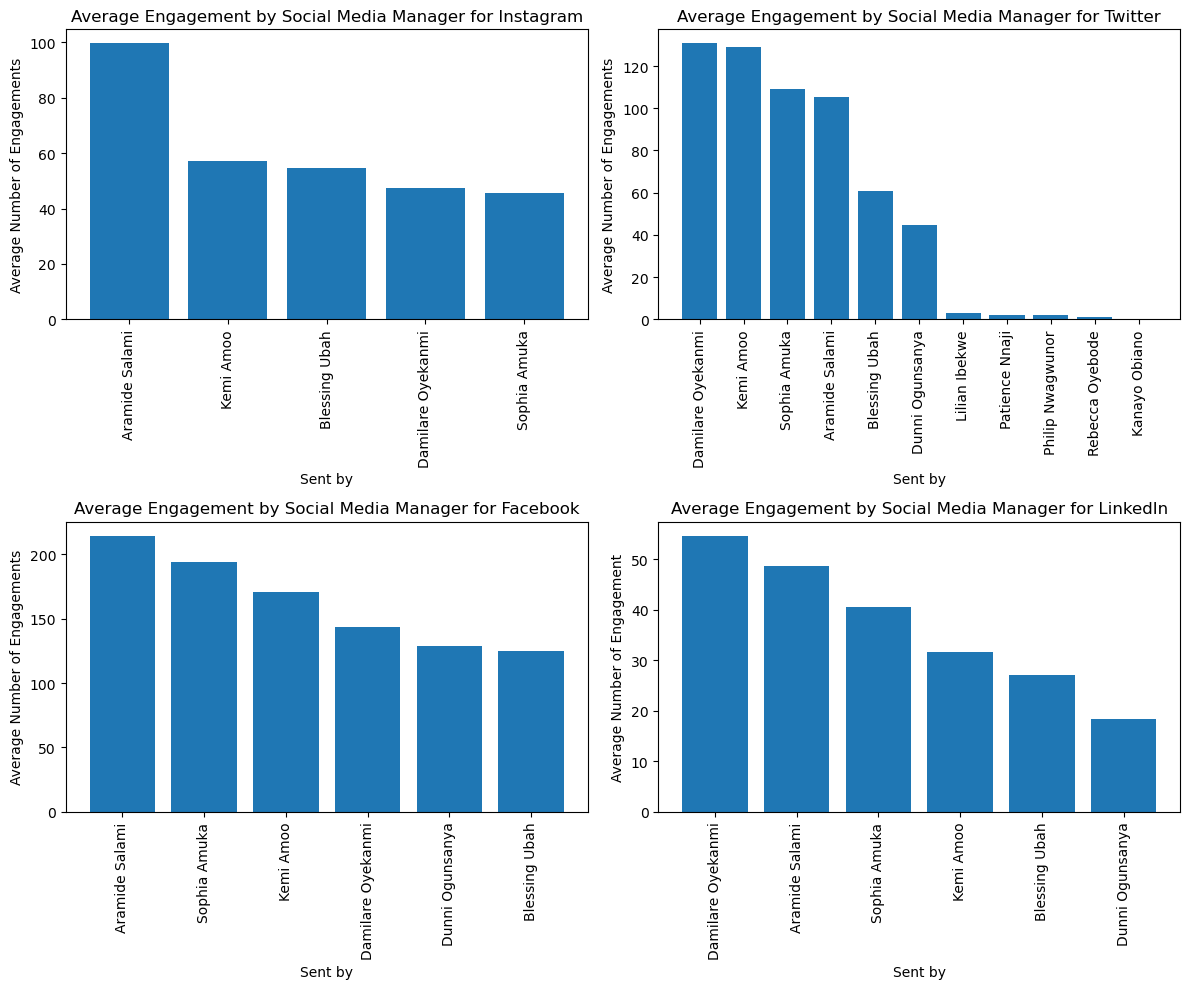

In [63]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the first bar chart on the first subplot
axes[0,0].bar(Instagram_sent_by.index, Instagram_sent_by.values)
axes[0,0].set_title('Average Engagement by Social Media Manager for Instagram')
axes[0,0].set_xlabel('Sent by')
axes[0,0].set_ylabel('Average Number of Engagements')  
axes[0,0].tick_params(axis='x', rotation=90) 

# Plot the second bar chart on the second subplot
axes[0,1].bar(twitter_sent_by.index, twitter_sent_by.values)
axes[0,1].set_title('Average Engagement by Social Media Manager for Twitter')
axes[0,1].set_xlabel('Sent by')
axes[0,1].set_ylabel('Average Number of Engagements')
axes[0,1].tick_params(axis='x', rotation=90)

# Plot the third bar chart on the third subplot
axes[1,0].bar(facebook_sent_by.index, facebook_sent_by.values)
axes[1,0].set_title('Average Engagement by Social Media Manager for Facebook')
axes[1,0].set_xlabel('Sent by')
axes[1,0].set_ylabel('Average Number of Engagements')
axes[1,0].tick_params(axis='x', rotation=90)

# Plot the fourth bar chart on the fourth subplot
axes[1,1].bar(linkedin_sent_by.index, linkedin_sent_by.values)
axes[1,1].set_title('Average Engagement by Social Media Manager for LinkedIn')
axes[1,1].set_xlabel('Sent by')
axes[1,1].set_ylabel('Average Number of Engagement') 
axes[1,1].tick_params(axis='x', rotation=90)

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

## Insights

- Contents posted by `Aramide Salami` had the highest average engagements on Instagram and Facebook 
- Contents posted by `Damilare Oyekanmi` had the highest average engagements on Twitter and LinkedIn 

## Recommendations
1. **Content Collaboration**: Encourage collaboration between Aramide Salami and Damilare Oyekanmi. They seem to have a strong influence and engagement on different platforms. Collaborative posts or cross-promotion between them could help leverage their audiences and increase engagement across multiple platforms.

2. **Content Sharing Strategies**: Aramide Salami's content is performing well on Instagram and Facebook, while Damilare Oyekanmi excels on Twitter and LinkedIn. Share the successful content strategies and best practices of each individual with the others to potentially improve their performance on those platforms.

3. **Platform-Specific Optimization**: Tailor content to the specific platforms where each individual performs best. For example, if Aramide Salami is excelling on Instagram, focus on visual content, stories, and Instagram-specific features. Similarly, if Damilare Oyekanmi is successful on LinkedIn, create more professional and industry-specific content.

4. **Engagement Analysis**: Continue monitoring and analyzing the engagement metrics for posts from Aramide Salami and Damilare Oyekanmi. Look for trends and patterns in the types of content, posting times, and audience interactions that drive higher engagement. Use this data to refine their content strategies further.

5. **Consistency**: Encourage both individuals to maintain a consistent posting schedule to keep their audiences engaged. Consistency in content posting helps build a loyal following and improves engagement over time.

6. **Experimentation**: Encourage both individuals to experiment with different content formats, such as videos, images, infographics, and long-form posts. Monitor the performance of these experiments to identify what works best for their respective platforms.

7. **Content Calendar**: Develop a content calendar for both Aramide Salami and Damilare Oyekanmi to plan and schedule posts in advance. A well-organized content calendar can help maintain consistency and ensure a variety of content types.

8. **Feedback Loop**: Encourage open communication and feedback between Aramide Salami, Damilare Oyekanmi, and your social media team. Regularly discuss the performance of posts, audience feedback, and emerging trends to adapt strategies as needed.


# 3.Content-Analysis

###  Do certain content types resonate differently with the audience on different platforms?

In [64]:
photos_df = df[df['Content Type'] == 'Photo']
photos_df = photos_df.groupby('Network')['Engagement Rate (per Impression)'].mean().sort_values(ascending = False).round(2)

video_df = df[df['Content Type'] == 'Video']
video_df = video_df.groupby('Network')['Engagement Rate (per Impression)'].mean().sort_values(ascending = False).round(2)

link_df = df[df['Content Type'] == 'Link']
link_df = link_df.groupby('Network')['Engagement Rate (per Impression)'].mean().sort_values(ascending = False).round(2)

text_df = df[df['Content Type'] == 'Text']
text_df = text_df.groupby('Network')['Engagement Rate (per Impression)'].mean().sort_values(ascending = False).round(2)

In [65]:
photos = pd.DataFrame({'Social Media Platform': photos_df.index, 
              'Average Engagement Rate for Photos': photos_df.values})

video = pd.DataFrame({'Social Media Platform': video_df.index, 
              'Average Engagement Rate for Videos': video_df.values})

link = pd.DataFrame({'Social Media Platform': link_df.index, 
              'Average Engagement Rate for Links': link_df.values})

text = pd.DataFrame({'Social Media Platform': text_df.index, 
              'Average Engagement Rate for Texts': text_df.values})

table1 = pd.concat([photos, video], axis = 1)
table2 = pd.concat([link, text], axis = 1)

display(table1, table2)

,Social Media Platform,Average Engagement Rate for Photos,Social Media Platform,Average Engagement Rate for Videos
0,Instagram,36.73,Instagram,16.76
1,LinkedIn,6.44,Facebook,6.69
2,Facebook,3.93,Twitter,3.42
3,Twitter,2.78,LinkedIn,2.24


,Social Media Platform,Average Engagement Rate for Links,Social Media Platform,Average Engagement Rate for Texts
0,LinkedIn,7.23,LinkedIn,3.18
1,Twitter,1.85,Facebook,3.02
2,Facebook,1.69,Twitter,1.70


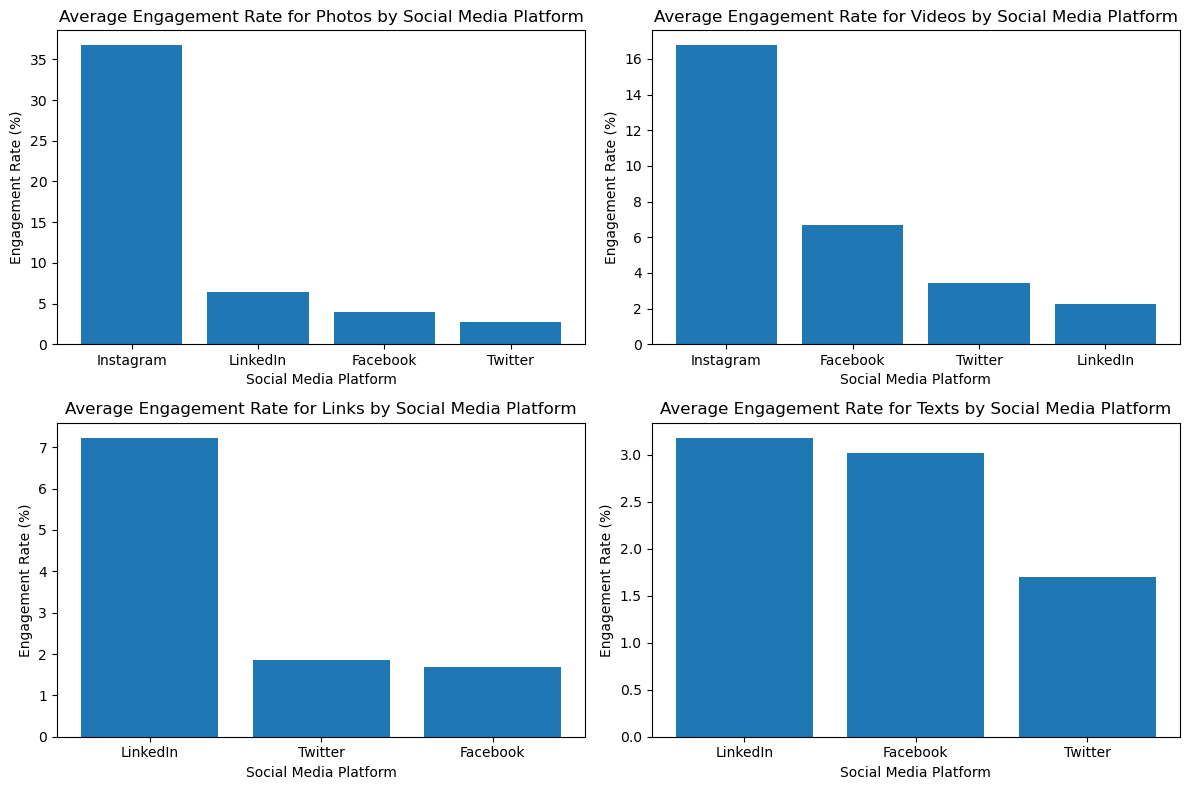

In [66]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the first bar chart on the first subplot
axes[0,0].bar(photos_df.index, photos_df.values)
axes[0,0].set_title('Average Engagement Rate for Photos by Social Media Platform')
axes[0,0].set_xlabel('Social Media Platform')
axes[0,0].set_ylabel('Engagement Rate (%)')  

# Plot the second bar chart on the second subplot
axes[0,1].bar(video_df.index, video_df.values)
axes[0,1].set_title('Average Engagement Rate for Videos by Social Media Platform')
axes[0,1].set_xlabel('Social Media Platform')
axes[0,1].set_ylabel('Engagement Rate (%)')  

# Plot the third bar chart on the third subplot
axes[1,0].bar(link_df.index, link_df.values)
axes[1,0].set_title('Average Engagement Rate for Links by Social Media Platform')
axes[1,0].set_xlabel('Social Media Platform')
axes[1,0].set_ylabel('Engagement Rate (%)')  

# Plot the fourth bar chart on the fourth subplot
axes[1,1].bar(text_df.index, text_df.values)
axes[1,1].set_title('Average Engagement Rate for Texts by Social Media Platform')
axes[1,1].set_xlabel('Social Media Platform')
axes[1,1].set_ylabel('Engagement Rate (%)')  

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

## Insights

This analysis shows that the type of content posted on social media platforms significantly influences engagement rates. 

- For photos and videos, Instagram excels
- LinkedIn leads in link-based contents
- LinkedIn and Facebook perform well for text-based content. 

## Recommendations
1. **Tailor Content to the Platform**:
   - Instagram is highly visual, so prioritize photo and video content for this platform. Use eye-catching visuals, stories, and reels to engage your audience.
   - For LinkedIn, focus on link-based content, such as sharing articles, blog posts, and industry-related news. This platform is known for its professional and informative content.
   - On Facebook, consider a mix of text-based content and visual content, as both perform well. Share engaging text updates, images, and videos to keep your audience interested.

2. **Cross-Promote Content**:
   - Cross-promote content across platforms when appropriate. For example, share a teaser video on Instagram with a link to the full article on LinkedIn or Facebook.
   
3. **Understand Your Audience**:
   - Analyze your audience demographics on each platform. Understanding who your followers are can help you tailor content that resonates with their interests and preferences.
   - Conduct surveys or gather feedback to gain insights into what type of content your audience prefers on each platform.

4. **Engage with Your Audience**:
   - Actively respond to comments and messages on each platform. Engagement with your audience fosters a sense of community and can lead to higher overall engagement.
   
5. **Consistency is Key**:
   - Maintain a consistent posting schedule on each platform to keep your audience engaged. Regularly sharing content builds anticipation and keeps your brand top-of-mind.


# 4.Posting-Strategy

### 4.1 What are the peak times for user engagement on each social media platform?

The time was divided into six categories to determine which categories has the highest engagement

- Early Morning 4am to 8am
- Morning 8am to 12pm
- Afternoon 12pm to 4pm
- Evening 4pm to 8pm
- Night 8pm to 12am
- Late Night 12am to 4am

In [67]:
def time_of_day(time):
    if (time > 4) and (time <= 8):
        return 'Early Morning'
    elif (time > 8) and (time <= 12 ):
        return 'Morning'
    elif (time > 12) and (time <= 16):
        return'Afternoon'
    elif (time > 16) and (time<= 20) :
        return 'Evening'
    elif (time > 20) and (time <= 24):
        return'Night'
    elif (time <= 4):
        return'Late Night'

In [68]:
def convert_dataframe_to_day_time(df):
    df = df.copy()
    df["time_of_the_day"] = pd.to_datetime(df.Date).dt.hour
    df.time_of_the_day = df.time_of_the_day.apply(lambda hour:time_of_day(hour))
    
    return df


In [69]:
df_instagram = convert_dataframe_to_day_time(df_instagram)
df_facebook = convert_dataframe_to_day_time(df_facebook)
df_twitter = convert_dataframe_to_day_time(df_twitter)
df_linkedin = convert_dataframe_to_day_time(df_linkedin)

Each Social Media Network will be grouped by time_of_the_day and the corresponding engagement will be gotten

In [70]:
peak_instagram = df_instagram.groupby("time_of_the_day").Engagements.mean().sort_values(ascending=False)
peak_twitter = df_twitter.groupby("time_of_the_day").Engagements.mean().sort_values(ascending=False)
peak_facebook = df_facebook.groupby("time_of_the_day").Engagements.mean().sort_values(ascending=False)
peak_linkedin = df_linkedin.groupby("time_of_the_day").Engagements.mean().sort_values(ascending=False)

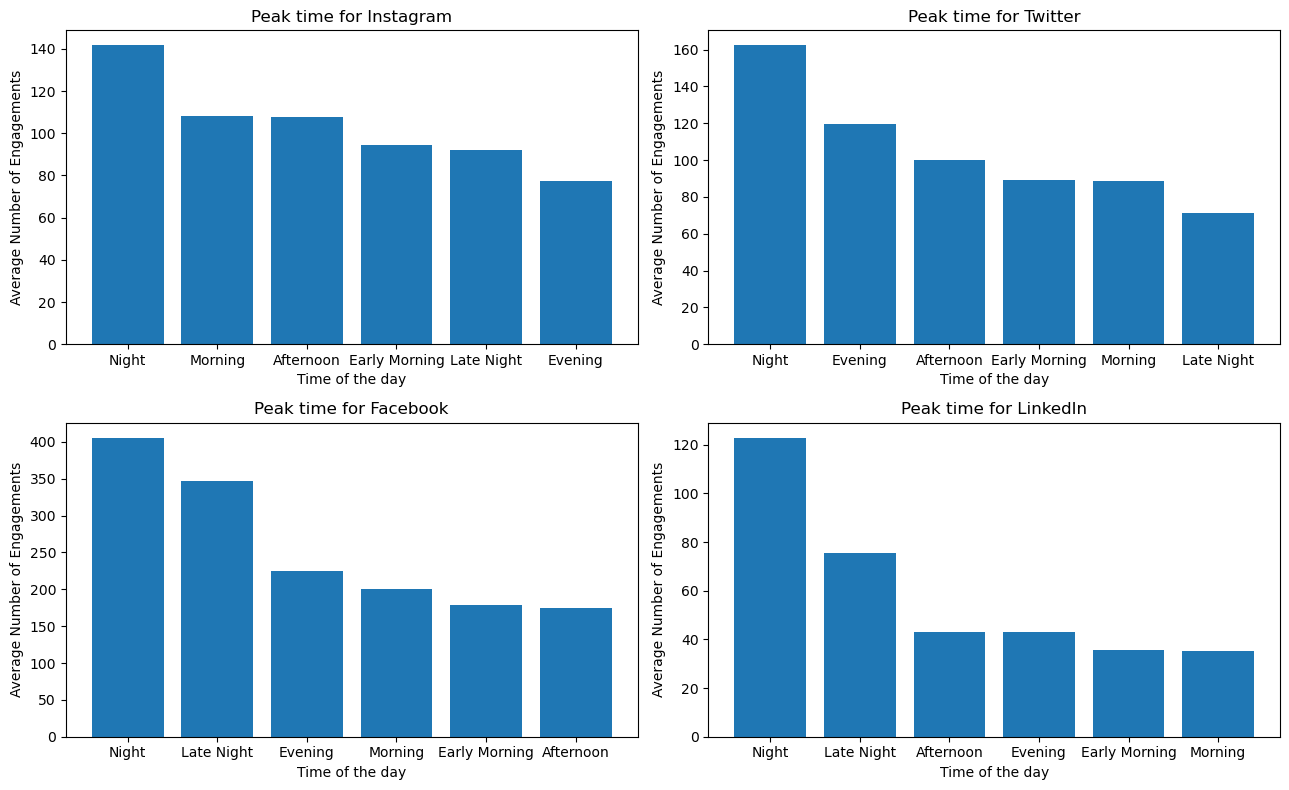

In [71]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(13, 8))

# Plot the first bar chart on the first subplot
axes[0,0].bar(peak_instagram.index, peak_instagram.values)
axes[0,0].set_title('Peak time for Instagram')
axes[0,0].set_xlabel('Time of the day')
axes[0,0].set_ylabel('Average Number of Engagements')  

axes[1,1].bar(peak_linkedin.index, peak_linkedin.values)
axes[1,1].set_title('Peak time for LinkedIn')
axes[1,1].set_xlabel('Time of the day')
axes[1,1].set_ylabel('Average Number of Engagements')  

axes[0,1].bar(peak_twitter.index, peak_twitter.values)
axes[0,1].set_title('Peak time for Twitter')
axes[0,1].set_xlabel('Time of the day')
axes[0,1].set_ylabel('Average Number of Engagements')  

axes[1,0].bar(peak_facebook.index, peak_facebook.values)
axes[1,0].set_title('Peak time for Facebook')
axes[1,0].set_xlabel('Time of the day')
axes[1,0].set_ylabel('Average Number of Engagements')  


# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()


## Insights

### Instagram
- The highest engagement occurs during the night (8 pm to 12 am).
- The lowest engagement is in the evening.

#### Recommendations:
  - Consider posting more content during the night as it seems to resonate well with your audience.
  - Analyze the content type and subject matter that performs best during the night and replicate it.

### Twitter:
- The highest engagement also occurs during the night, followed by evening.
- The lowest engagement is during late night.

#### Recommendations:
  - Focus on increasing activity during the night and evening.
  - Pay attention to trending topics during these times for better engagement.

### Facebook:
- Engagement is highest at night and late night.
- The lowest engagement occurs during the afternoon.

#### Recommendations:
  - Continue to post content during the night and late night.
  - Experiment with different content formats and styles during the afternoon to boost engagement.

### LinkedIn:
- LinkedIn engagement is relatively lower compared to the other platforms.
- Engagement is highest at night and lowest during the afternoon.

#### Recommendations:
  - While LinkedIn engagement is generally lower, consider posting during the night to maximize reach.
  - Focus on creating professional and industry-relevant content to improve engagement on this platform.

Additional Recommendations:
- Analyze the specific content types, topics, and post formats that perform well during the peak engagement times on each platform. Tailor your content strategy accordingly.
- Schedule posts to align with the identified peak engagement times for each platform.

![picture](Dashboard.png)

# Insights-and-Recommedation-Summary

**Instagram:**
- Most engaging content type: Photos
- Average engagement rate: 36.73%
Recommendations:
  - Prioritize posting more photos.
  - Ensure high-quality, visually appealing photos.
  
**Twitter:**
- Most engaging content type: Videos
- Average engagement rate: 3.42%
Recommendations:
  - Focus on creating attention-grabbing videos.
  - Keep videos concise and impactful.
  
**Facebook:**
- Most engaging content type: Videos
- Average engagement rate: 6.69%
Recommendations:
  - Invest in video content.
  - Experiment with live videos and interactive content.
  
**LinkedIn:**
- Most engaging content type: Documents
- Average engagement rate: 18.08%
Recommendations:
  - Share informative documents, whitepapers, or reports.
  - Leverage LinkedIn's professional context.

**Platform with the highest engagement rate: Instagram (32.27%), followed by LinkedIn (5.85%), Facebook (4.13%), and Twitter (2.68%).**
Recommendations:
  - Allocate more resources and content strategy to Instagram.
  - Maintain a strong presence on LinkedIn for professional content.
  - Optimize Facebook content for its substantial user base.
  - Review and adjust the Twitter strategy for improved engagement.

**Engagement trends over time:**
- Instagram: Significant growth with minor fluctuations.
- Twitter: Fluctuations with stable 2023 engagement.
- Facebook: Rapid growth from 2013 to 2017, followed by fluctuations.
- LinkedIn: Growth since 2018 with consistent rates.

**Content Analysis:**
- Instagram and Facebook: Aramide Salami's posts have the highest average engagement.
- Twitter and LinkedIn: Damilare Oyekanmi's posts have the highest average engagement.
Recommendations:
  - Encourage collaboration between both individuals.
  - Share successful content strategies.
  - Tailor content to platforms.

**Content Type Analysis:**
- Instagram and Facebook excel with photos and videos.
- LinkedIn leads in link-based content.
- Facebook and LinkedIn perform well with text-based content.
Recommendations:
  - Tailor content to platform preferences.
  - Cross-promote content when appropriate.

**Peak Engagement Times:**
- Instagram and Twitter: Highest engagement at night (8pm to 12am)
- Facebook: Engagement peaks at night and late night. (8pm to 12am)
- LinkedIn: Engagement highest at night.
Recommendations:
  - Schedule posts during peak engagement times.
  - Analyze content performance during these times for optimization.



**Thank you for reading.**

- My LinkedIn - [LinkedIn](https://www.linkedin.com/in/judithokon/)
- My Website - [Website](https://judithokon.com/)